## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import itertools

import sklearn
import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *
import umap_utils
reload(umap_utils)
from umap_utils import *


import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
import plt_utils as pu
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
# Dimension reduction and clustering libraries
import umap
import umap.plot
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn import manifold
from plt_utils import generateAxesForMultiplePlots
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family']='serif'
from sklearn.decomposition import KernelPCA
from matplotlib.legend import Legend
from matplotlib.lines import Line2D

# Many realizations

## One sim

### data preparation

In [ ]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'

externals = [[tmp2 for tmp2 in sims if tmp is not tmp2] for tmp in sims]
data = []
ext  = []
#for i, sim in enumerate(sims):

sim = 'TNG'; i = 0;

study_name = f"{sim}_HI_cnn_zero_monopole_1_new_split"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
print(path, sim)


for i, sim in enumerate(sims[1:]):
    rel_err     = []
    crs_rel_err = []
    for num_trial in range(1000):
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{sim}_HI_cnn_zero_monopole_1_new_split_{num_trial}_vib.pt"
        if os.path.isfile(path) and os.path.isfile(path_trial):
            print("file exists!")
            mist = MIST(sim=[sim], field=field, batch_size=32, 
                        data_type = 'image',
                        normalization=True,
                        monopole = True,
                        device=device, robust_axis='sim')
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn",num_trial=num_trial, fpath=fpath)
                #mse_om, mse_sig, _,_,_ = mist.get_score_cnn()
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
    
                print(y_res_om)
                if y_res_om > 10:
                    print(y_res_om)
                    continue
                    
                tmp = list()
                for sim_ext in externals[i]:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    
                    tmp.append([num_trial, y_res_om, y_res_sg])
                crs_rel_err.append(tmp)
                rel_err.append([num_trial, y_res_om_0, y_res_sg_0])
            except:
                continue
    np.save(f"rel_err_{sim}", rel_err)
    np.save(f"crs_rel_err_{sim}", crs_rel_err)



/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_HI_cnn_zero_monopole_1_new_split.db TNG
file exists!
file exists!
file exists!
file exists!
file exists!
num_trial=4, params={'dropout': 0.009299126986091595, 'hidden': 8, 'lr': 6.056139119707281e-06, 'wd': 0.0012321207975960092, 'z_dim': 430} 
file exists!
num_trial=5, params={'dropout': 0.24998350616178436, 'hidden': 7, 'lr': 0.0016981070187158825, 'wd': 5.093266625213401e-08, 'z_dim': 63} 
file exists!
num_trial=6, params={'dropout': 0.08835311707573336, 'hidden': 8, 'lr': 2.76372749685535e-06, 'wd': 1.8790519557534366e-05, 'z_dim': 1645} 
file exists!
num_trial=7, params={'dropout': 0.17940806174716623, 'hidden': 8, 'lr': 1.3207626260563813e-06, 'wd': 8.035483056746344e-06, 'z_dim': 1701} 
file exists!
num_trial=8, params={'dropout': 0.39031722892469295, 'hidden': 7, 'lr': 4.474770004030887e-05, 'wd': 1.0819839670713472e-07, 'z_dim': 368} 
file exists!
num_trial=9, params={'dropout': 0.20647319137616973, 'hidden'

In [4]:
print("Done!")

Done!


### plot

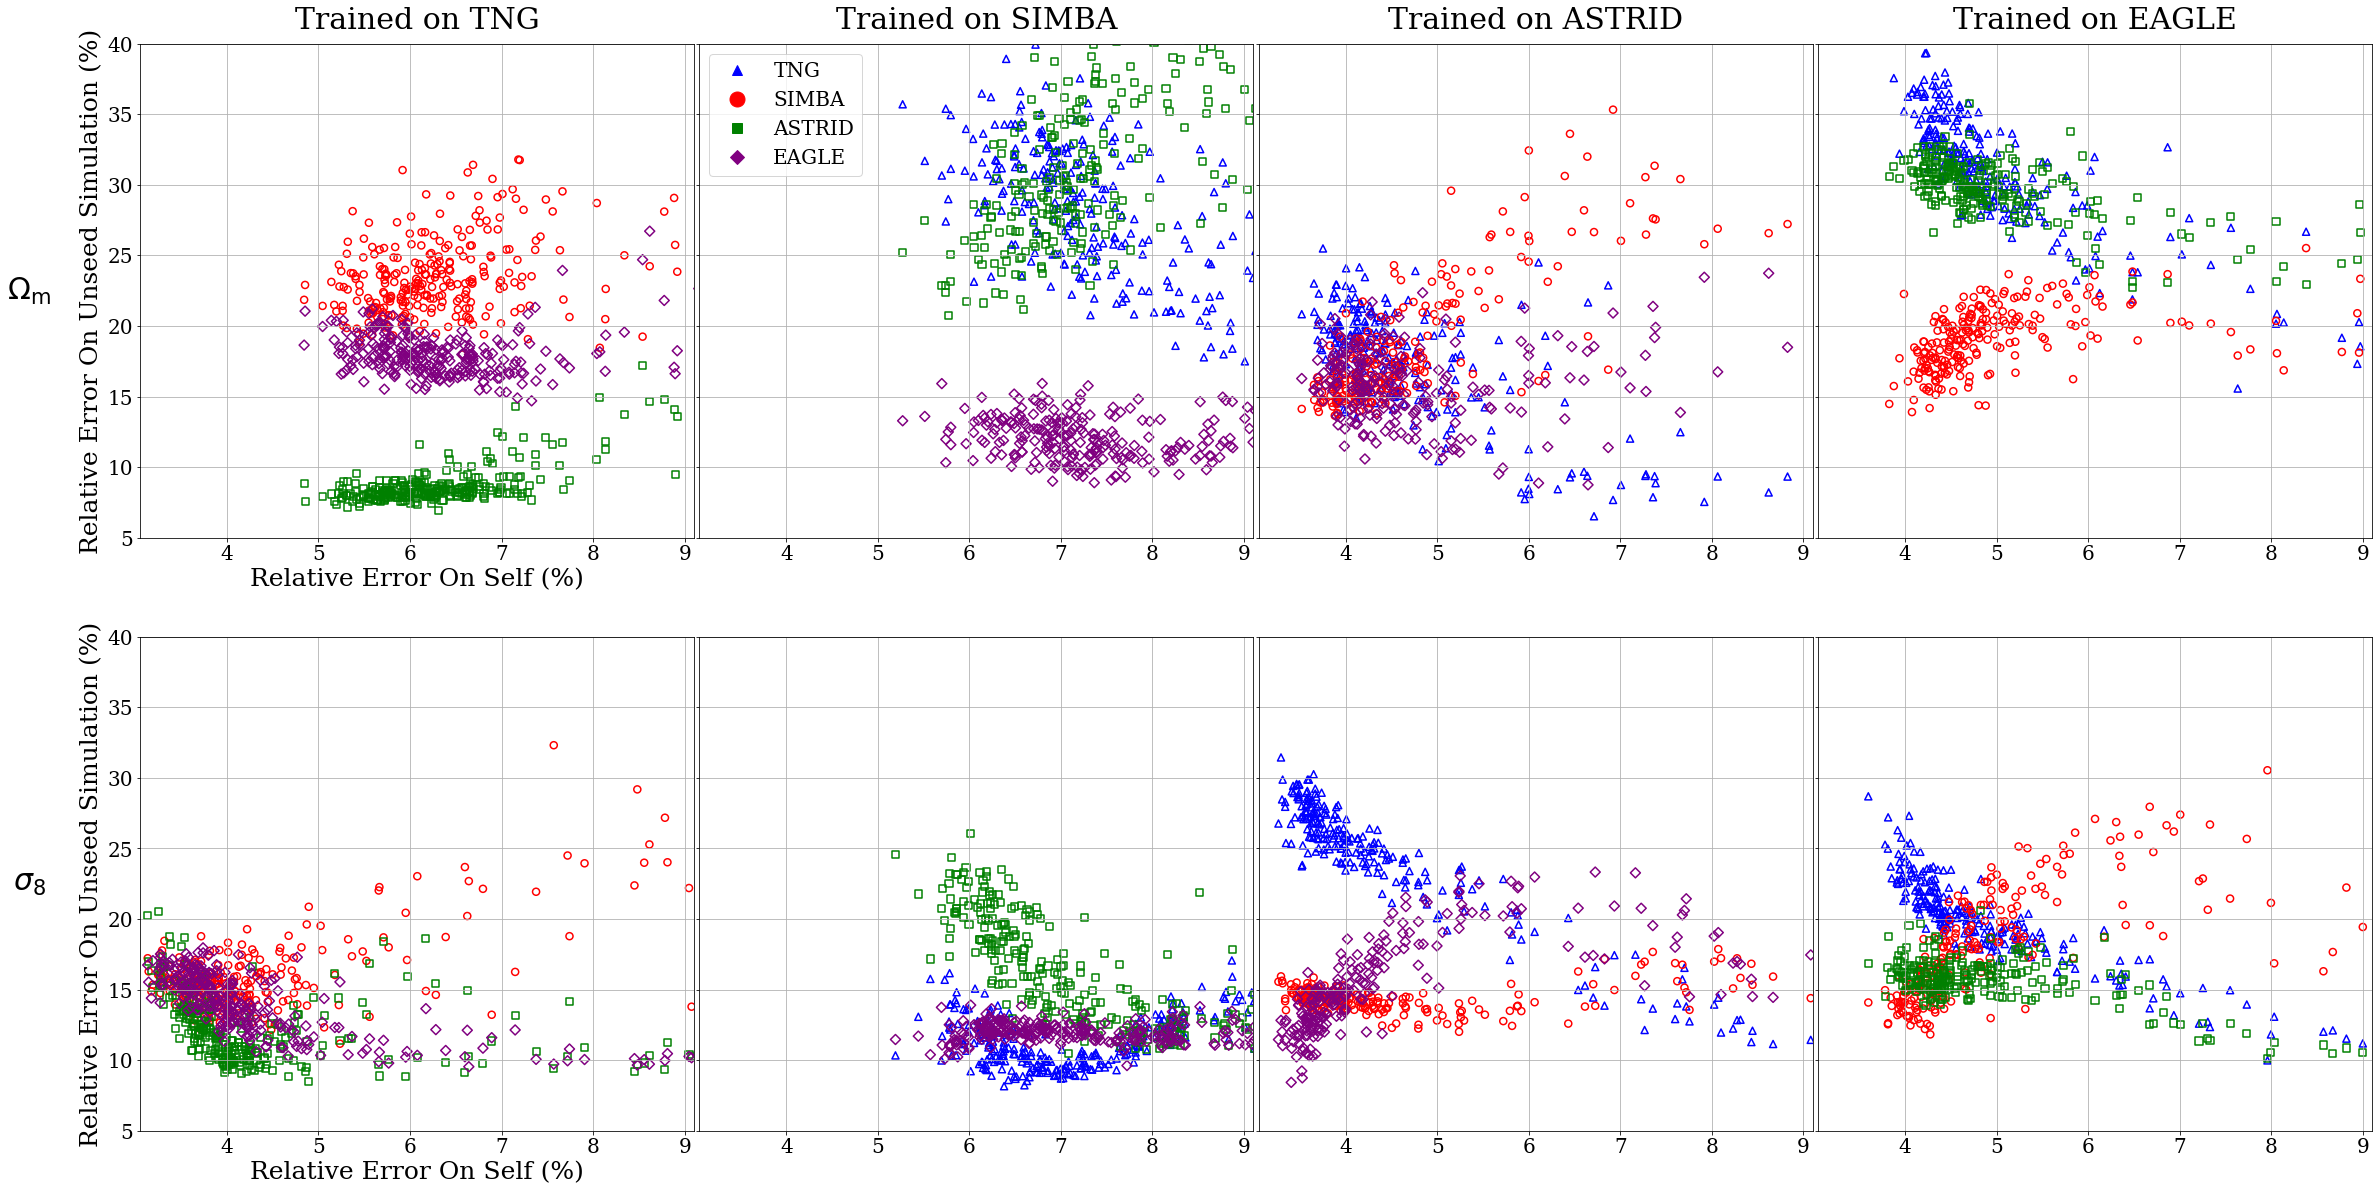

In [145]:
### plt.rcParams['font.size'] = 27
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 4,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(40,20),
                                      hspace=0.20,wspace=0.01)
#pu.remove_inner_axes(axes,size=[X,Y])

for i in range(X):
    for j in range(Y):
        pass
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            axes[i,j].set_yticklabels([])

sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
combinations = list(itertools.combinations(sims, 2))
param=1
colors = {'SIMBA':'r', 'TNG':'b', 'ASTRID':'g', 'EAGLE':'purple'}
ms = {'SIMBA':'o', 'TNG':'^', 'ASTRID':'s', 'EAGLE':'D'}
for x, sim in enumerate(sims):
    externals = [tmp2 for tmp2 in sims if sim is not tmp2]
    rel_err     = np.load(f"rel_err_{sim}_all.npy")
    crs_rel_err = np.load(f"crs_rel_err_{sim}_all.npy")
    for y, sim2 in enumerate(externals):
        #axes[x,y].set_ylim(0.47,1.03)
        #axes[x,y].set_xlim(2.9, 6.1)
        #axes[x,y].grid()
        #axes[x,y].set_title(f"{sim2}",fontsize=20,pad=15)
        #axes[x,y].scatter(rel_err[:,param], crs_rel_err[:,x,param], c='darkblue', s=10)
        axes[x,0].grid();axes[x,1].grid()
        axes[x,0].set_title(f"Trained on {sim}",pad=15,fontsize=30)
        #axes[x,1].set_title(r"$\sigma_8$",fontsize=20,pad=15)
        try:
            #axes[0,y].scatter(rel_err[:,param], crs_rel_err[:,x,param], c='darkblue', s=10)
            #axes[1,y].scatter(rel_err[:,param], crs_rel_err[:,x,2], c='darkred', s=10)
            axes[x,0].scatter(rel_err[:,param], crs_rel_err[:,y,param], ec=colors[sim2], lw=1.5, marker=ms[sim2], s=50, fc='none')
            axes[x,1].scatter(rel_err[:,2], crs_rel_err[:,y,2], ec=colors[sim2], marker=ms[sim2], lw=1.5,  s=50, fc='none')
            #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
            #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
            axes[x,0].set_xlim(3.05,9.1)
            axes[x,0].set_ylim(5,40)
            axes[x,1].set_xlim(3.05,9.1)
            axes[x,1].set_ylim(5,40)
            """
            ### AUC score horizontal
            axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
            axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
            axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
            axes[x,y].fill_between([2.9,6.1], 
                                   np.mean(auc[:,3])-np.std(auc[:,3]),
                                   np.mean(auc[:,3])+np.std(auc[:,3]),
                                   color='pink', alpha=0.3)
                                   """
            """
            ### Mean Error score vertical
            axes[x,y].axvline(x=np.mean(mean_rel), c='b')
            axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
            axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
            axes[x,y].fill_between([2.9,6.1], 
                                   np.mean(mean_rel)-np.std(mean_rel),
                                   np.mean(mean_rel)+np.std(mean_rel),
                                   color='pink', alpha=0.3)"""
            """
            text=\
                r"AUC score = {:.2f} $\pm$ {:.2f}".format(np.mean(auc[:,3]),np.std(auc[:,3]))
            axes[x,y].text(0.96, 0.96, text,
                transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
                """
            
        except:
            continue


scat = [Line2D([0],[0], c=colors['TNG'], marker=ms['TNG'], linestyle='None',markersize=10),
        Line2D([0],[0], c=colors['SIMBA'], marker=ms['SIMBA'], linestyle='None',markersize=15),
       Line2D([0],[0], c=colors['ASTRID'], marker=ms['ASTRID'], linestyle='None',markersize=10),
       Line2D([0],[0], c=colors['EAGLE'], marker=ms['EAGLE'], linestyle='None',markersize=10),]
#axes.legend(lines, [f'{time:.0f}' for time in sc_time],
#                bbox_to_anchor=(0.999, 0.999))
axes[1,0].legend(scat,sims,fontsize=20)

axes[0,0].text(-0.2, 0.5, r"$\Omega_\mathrm{m}$",
            transform=axes[0,0].transAxes, ha='center',va='center',fontsize=30)

axes[0,1].text(-0.2, 0.5, r"$\sigma_\mathrm{8}$",
            transform=axes[0,1].transAxes, ha='center',va='center',fontsize=30)

axes[0,0].set_ylabel("Relative Error On Unseed Simulation (%)")
axes[0,1].set_ylabel("Relative Error On Unseed Simulation (%)")
axes[0,1].set_xlabel("Relative Error On Self (%)")
axes[0,0].set_xlabel("Relative Error On Self (%)")
#axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_one_sims.png", dpi=200, bbox_inches="tight")


In [164]:
rel_err.min(axis=0)

array([0.        , 3.82710126, 3.59840056])

In [167]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
combinations = list(itertools.combinations(sims, 2))
param=1
colors = {'SIMBA':'r', 'TNG':'b', 'ASTRID':'g', 'EAGLE':'purple'}
ms = {'SIMBA':'o', 'TNG':'^', 'ASTRID':'s', 'EAGLE':'D'}
for x, sim in enumerate(sims):
    externals = [tmp2 for tmp2 in sims if sim is not tmp2]
    rel_err     = np.load(f"rel_err_{sim}_all.npy")
    crs_rel_err = np.load(f"crs_rel_err_{sim}_all.npy")
    _, min1, min2 = rel_err.min(axis=0)
    idx = np.logical_and(rel_err[:,1]<min1+1,rel_err[:,2]<min2+1)
    rel_err = rel_err[idx,:]
    crs_rel_err = crs_rel_err[idx,:,:]
    print(r"{}: {:.2f} $\pm$ {:.2f}, {:.2f} $\pm$ {:.2f}"\
                  .format(sim, np.mean(rel_err[:,1]),np.std(rel_err[:,1]), np.mean(rel_err[:,2]),np.std(rel_err[:,2])))
    print()
    for y, sim2 in enumerate(externals):
        print(r"{}: {:.2f} $\pm$ {:.2f}, {:.2f} $\pm$ {:.2f}"\
          .format(sim2, np.mean(crs_rel_err[:,y,1]),np.std(crs_rel_err[:,y,1]), np.mean(crs_rel_err[:,y,2]),np.std(crs_rel_err[:,y,2])))
    print('\n')

TNG: 5.54 $\pm$ 0.23, 3.64 $\pm$ 0.24

SIMBA: 21.95 $\pm$ 1.66, 15.49 $\pm$ 1.25
ASTRID: 8.13 $\pm$ 0.46, 13.14 $\pm$ 2.47
EAGLE: 18.75 $\pm$ 1.26, 15.27 $\pm$ 1.41


SIMBA: 5.89 $\pm$ 0.26, 5.87 $\pm$ 0.25

TNG: 32.46 $\pm$ 2.79, 11.84 $\pm$ 1.90
ASTRID: 24.43 $\pm$ 2.30, 22.32 $\pm$ 1.69
EAGLE: 13.02 $\pm$ 1.34, 12.07 $\pm$ 0.93


ASTRID: 4.08 $\pm$ 0.22, 3.70 $\pm$ 0.22

TNG: 19.27 $\pm$ 2.40, 27.00 $\pm$ 1.67
SIMBA: 16.01 $\pm$ 1.54, 14.55 $\pm$ 0.53
EAGLE: 16.34 $\pm$ 2.14, 13.40 $\pm$ 1.91


EAGLE: 4.40 $\pm$ 0.21, 4.22 $\pm$ 0.21

TNG: 33.97 $\pm$ 2.49, 22.03 $\pm$ 1.94
SIMBA: 17.82 $\pm$ 1.68, 15.33 $\pm$ 1.92
ASTRID: 30.55 $\pm$ 1.32, 16.05 $\pm$ 1.14




"\naxes[i].text(0.05, 0.95, texts[i],\n            transform=axes[i].transAxes, ha='left',va='top')"

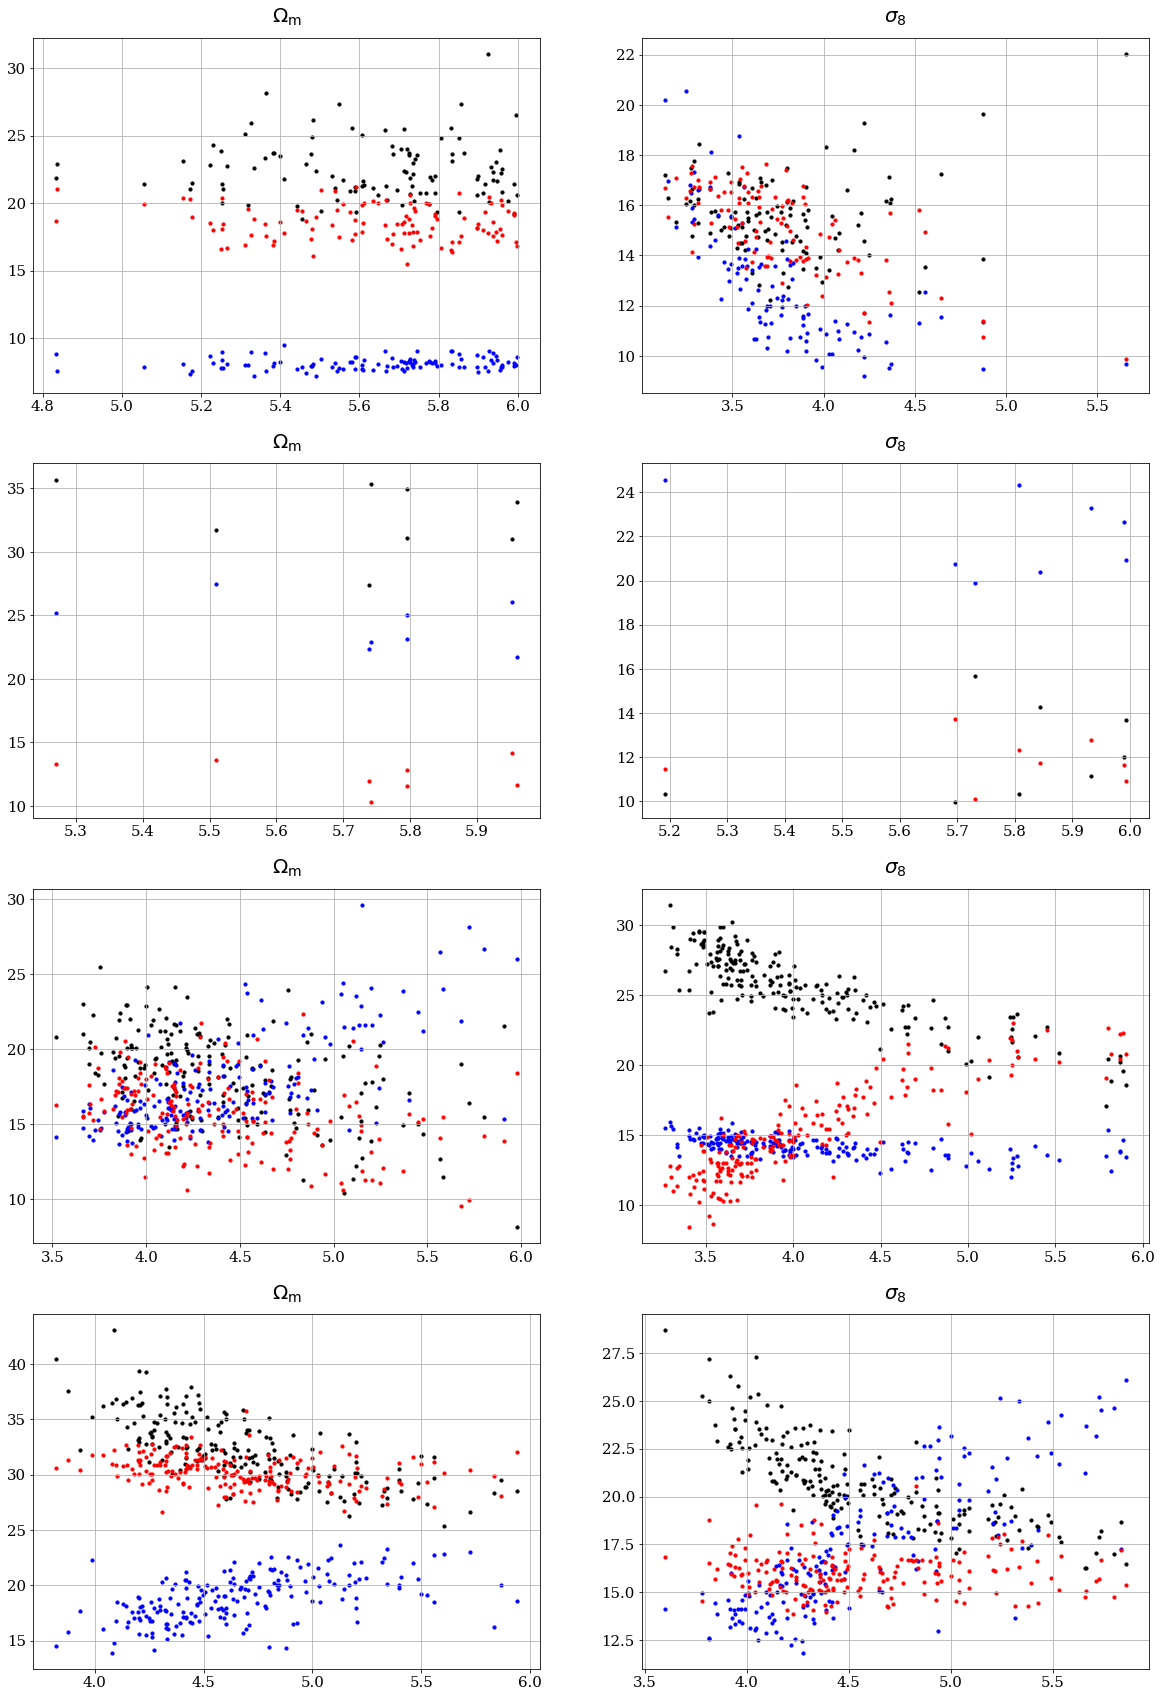

In [12]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 2,4
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(20,30),
                                      hspace=0.20,wspace=0.20)
#pu.remove_inner_axes(axes,size=[X,Y])

for i in range(X):
    for j in range(Y):
        pass
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        #if i != 0:
            #axes[i,j].set_yticklabels([])

sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
combinations = list(itertools.combinations(sims, 2))
param=1
colors = ['k', 'b', 'r', 'p']
for y, sim in enumerate(sims):
    externals = [tmp2 for tmp2 in sims if sim is not tmp2]
    rel_err     = np.load(f"rel_err_{sim}.npy")
    crs_rel_err = np.load(f"crs_rel_err_{sim}.npy")
    for x, sim2 in enumerate(externals):
        #axes[x,y].set_ylim(0.47,1.03)
        #axes[x,y].set_xlim(2.9, 6.1)
        #axes[x,y].grid()
        #axes[x,y].set_title(f"{sim2}",fontsize=20,pad=15)
        #axes[x,y].scatter(rel_err[:,param], crs_rel_err[:,x,param], c='darkblue', s=10)
        axes[0,y].grid();axes[1,y].grid()
        axes[0,y].set_title(r"$\Omega_\mathrm{m}$",fontsize=20,pad=15)
        axes[1,y].set_title(r"$\sigma_8$",fontsize=20,pad=15)
        try:
            #axes[0,y].scatter(rel_err[:,param], crs_rel_err[:,x,param], c='darkblue', s=10)
            #axes[1,y].scatter(rel_err[:,param], crs_rel_err[:,x,2], c='darkred', s=10)
            axes[0,y].scatter(rel_err[:,param], crs_rel_err[:,x,param], c=colors[x], s=10)
            axes[1,y].scatter(rel_err[:,2], crs_rel_err[:,x,2], c=colors[x], s=10)
            #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
            #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
            """
            ### AUC score horizontal
            axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
            axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
            axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
            axes[x,y].fill_between([2.9,6.1], 
                                   np.mean(auc[:,3])-np.std(auc[:,3]),
                                   np.mean(auc[:,3])+np.std(auc[:,3]),
                                   color='pink', alpha=0.3)
                                   """
            """
            ### Mean Error score vertical
            axes[x,y].axvline(x=np.mean(mean_rel), c='b')
            axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
            axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
            axes[x,y].fill_between([2.9,6.1], 
                                   np.mean(mean_rel)-np.std(mean_rel),
                                   np.mean(mean_rel)+np.std(mean_rel),
                                   color='pink', alpha=0.3)"""
            """
            text=\
                r"AUC score = {:.2f} $\pm$ {:.2f}".format(np.mean(auc[:,3]),np.std(auc[:,3]))
            axes[x,y].text(0.96, 0.96, text,
                transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
                """
            
        except:
            continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

#axes[0,1].set_ylabel("AUC Score")
#axes[0,1].set_xlabel("Mean Relative Error (%)")
#plt.savefig("paper_plot/stability_one_sims.png", dpi=200, bbox_inches="tight")


## Two sims

### Data preparation

In [1]:
import torch
import gc

In [6]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
data   = list()
params = list()
label  = list()

for i, comb in enumerate(combinations):
    auc = []
    for fname in study_names:
        study_name = f"{comb[0]}_{comb[1]}_" + fname
        storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
        path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
        print(path, comb)
        if os.path.isfile(path):  
            for num_trial in range(1000):
                path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{sim}_{study_name}_{num_trial}_vib.pt"
                if os.path.isfile(path_trial): 
                    print("file exists!")
                    try:
                        vib_umap = UMAP(sim=list(comb),field=field,study_name=study_name, fpath=fpath)#, ext_sim='ASTRID')
                        auc.append([num_trial, vib_umap.auc])
                    except:
                        continue
                    torch.cuda.empty_cache()
                    gc.collect()
    np.save(f"auc_{comb[0]}_{comb[1]}", auc)

/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_zero_monopole_1_new.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_zero_monopole_1_new_split.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_zero_monopole_1_new.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_zero_monopole_1_new_split.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_EAGLE_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'EAGLE')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_EAGLE_HI_cnn_zero_monopole_1_new.db ('T

KeyboardInterrupt: 

In [2]:
!nvidia-smi

Sun Sep 15 16:19:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           Off |   00000000:18:00.0 Off |                    0 |
| N/A   37C    P0             64W /  300W |    6222MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [127]:
# To select the GPU with ID 0
torch.cuda.set_device(1)

# Check if the selected GPU is being used
print("Current device:", torch.cuda.current_device())
print("GPU in use:", torch.cuda.get_device_name(torch.cuda.current_device()))
device = torch.device("cuda:1")

Current device: 1
GPU in use: Tesla V100-SXM2-32GB


In [ ]:
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
sims  = ['TNG', 'SIMBA']; field = 'HI'
study_name = f"{sims[0]}_{sims[1]}_{field}_cnn_enc_dec_mid_monopole_1"


auc = []
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
if os.path.isfile(path):
    print(path, comb)
    mist = MIST(sim=sims, field=field, batch_size=32, data_type = 'image',
                normalization=True, monopole = True, device=device)
    for num_trial in range(1000):
        torch.cuda.empty_cache()
        gc.collect()
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{study_name}_{num_trial}_vib.pt"
        if os.path.isfile(path_trial): 
            print("file exists!")
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=num_trial, fpath=fpath)
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)

                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                
                _, __auc, _, _, _ = do_classification(mist)
                print(f"The AUC score is {__auc}.")

                tmp = list()
                for sim_ext in ['ASTRID', 'EAGLE']:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    
                    tmp.append([num_trial, y_res_om, y_res_sg])
            
                auc.append([num_trial, y_res_om_0, y_res_sg_0, __auc, tmp])
                print(auc[-1])
            except:
                continue
np.save(f"auc_{comb[0]}_{comb[1]}_mid", auc)

/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_enc_dec_mid_monopole_1.db ('ASTRID', 'EAGLE')
file exists!
The AUC score is 0.5087175384205087.
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.004, % error=21.218%, R2 score=0.682,chi2=69552644062608584.000, bias=-0.031
$\sigma_8$: MSE=0.016, % error=12.240%, R2 score=-0.191,chi2=1.585, bias=0.064
21.126399414120367
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.010, % error=25.470%, R2 score=0.274,chi2=82163422135294.844, bias=0.077
$\sigma_8$: MSE=0.019, % error=13.129%, R2 score=-0.410,chi2=2.071, bias=0.081
25.407998696680124
[0, 12.787995765422671, 11.503596515500238, 0.5087175384205087, [[0, 21.126399414120367, 12.255313171740315], [0, 25.407998696680124, 13.119647641988438]]]
file exists!
The AUC score is 0.5101543487682101.
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.005, % error=25.507%, R2 score=0.599,chi2=4.850, bias=-0.050
$\sigma_8$: MSE=0.013, % error=12.882%, R2 score=0.006,chi

In [ ]:
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
sims  = ['TNG', 'SIMBA']; field = 'HI'
study_name = f"{sims[0]}_{sims[1]}_{field}_cnn_enc_dec_mid_monopole_1"


auc = []
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
if os.path.isfile(path):
    print(path, comb)
    mist = MIST(sim=sims, field=field, batch_size=32, data_type = 'image',
                normalization=True, monopole = True, device=device)
    for num_trial in range(1000):
        torch.cuda.empty_cache()
        gc.collect()
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{study_name}_{num_trial}_vib.pt"
        if os.path.isfile(path_trial): 
            print("file exists!")
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=num_trial, fpath=fpath)
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)

                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                
                _, __auc, _, _, _ = do_classification(mist)
                print(f"The AUC score is {__auc}.")

                tmp = list()
                for sim_ext in ['ASTRID', 'EAGLE']:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    
                    tmp.append([num_trial, y_res_om, y_res_sg])
            
                auc.append([num_trial, y_res_om_0, y_res_sg_0, __auc, tmp])
                print(auc[-1])
            except:
                continue
np.save(f"auc_{comb[0]}_{comb[1]}_mid", auc)

### plot

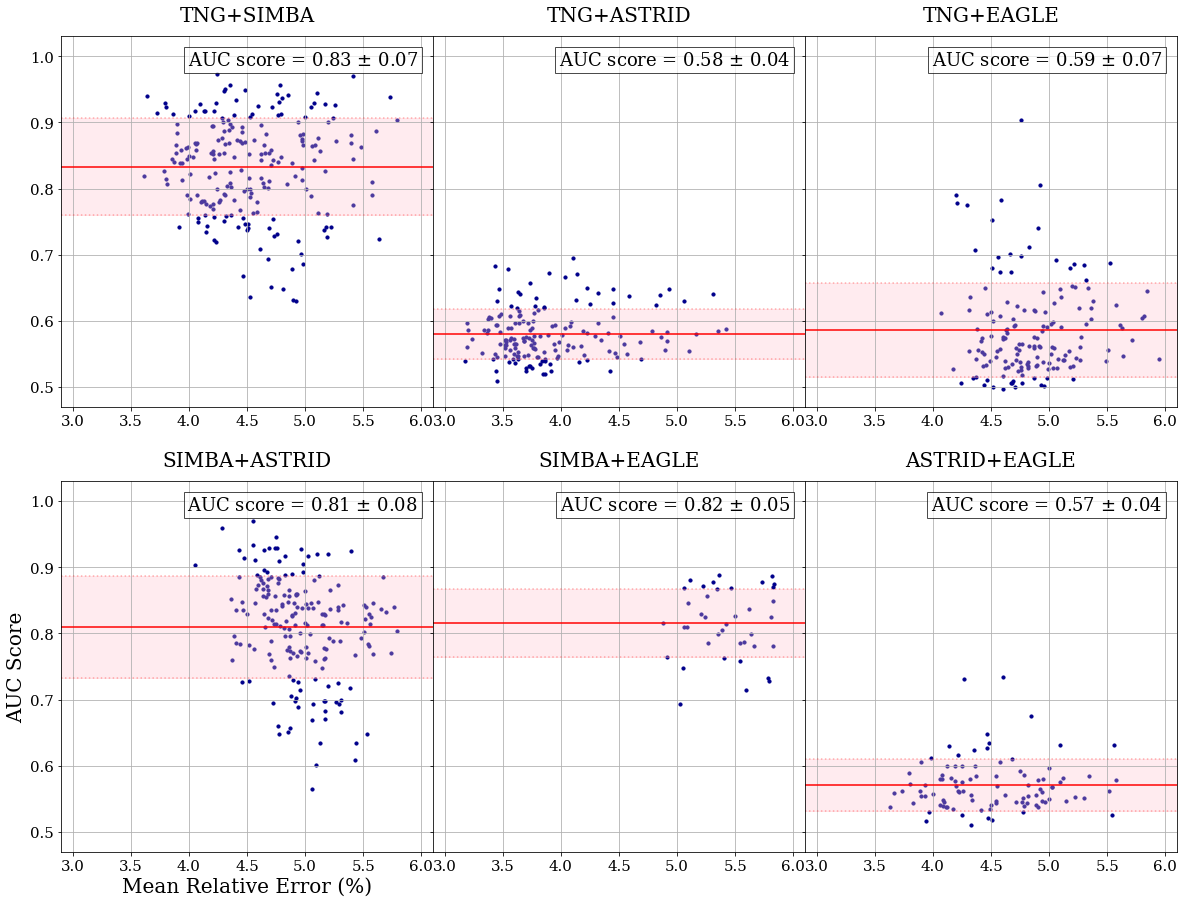

In [9]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 3,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(20,15),
                                      hspace=0.20,wspace=0.00)
#pu.remove_inner_axes(axes,size=[X,Y])

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            axes[i,j].set_yticklabels([])

sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]

for i, comb in enumerate(combinations):
    x = i%X
    y = i//X
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    axes[x,y].set_title(f"{comb[0]}+{comb[1]}",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_{comb[0]}_{comb[1]}.npy")
        mean_rel = (auc[:,2]+auc[:,1])/2
        axes[x,y].scatter(mean_rel, auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,3])-np.std(auc[:,3]),
                               np.mean(auc[:,3])+np.std(auc[:,3]),
                               color='pink', alpha=0.3)
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""AUC score = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,3]),np.std(auc[:,3]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_auc_two_sims.png", dpi=200, bbox_inches="tight")

In [6]:
auc = np.load("auc_TNG_SIMBA_zero_2.npy")

In [7]:
auc

array([[1.10000000e+01, 9.16296630e-01, 3.66485191e+00, ...,
        1.40900090e+01, 1.08621427e-01, 3.69285216e-02],
       [1.80000000e+01, 9.05940594e-01, 4.48460653e+00, ...,
        1.27309135e+01, 6.27357034e-02, 3.22030156e-02],
       [1.90000000e+01, 8.69216922e-01, 4.64063217e+00, ...,
        1.28964662e+01, 5.73207560e-02, 2.91923148e-02],
       ...,
       [3.84000000e+02, 7.55520552e-01, 3.86199448e+00, ...,
        1.18486543e+01, 8.64107778e-02, 4.68389371e-02],
       [3.89000000e+02, 8.75630896e-01, 5.14531611e+00, ...,
        1.07371194e+01, 9.95250917e-03, 4.00935304e-02],
       [3.95000000e+02, 7.97729773e-01, 4.91072827e+00, ...,
        1.44074501e+01, 1.31886298e-01, 4.34510969e-02]])

In [ ]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 3,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(20,15),
                                      hspace=0.20,wspace=0.00)
#pu.remove_inner_axes(axes,size=[X,Y])

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            axes[i,j].set_yticklabels([])

sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]

for i, comb in enumerate(combinations):
    x = i%X
    y = i//X
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    axes[x,y].set_title(f"{comb[0]}+{comb[1]}",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_{comb[0]}_{comb[1]}.npy")
        mean_rel = (auc[:,2]+auc[:,1])/2
        axes[x,y].scatter(mean_rel, auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,3])-np.std(auc[:,3]),
                               np.mean(auc[:,3])+np.std(auc[:,3]),
                               color='pink', alpha=0.3)
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""AUC score = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,3]),np.std(auc[:,3]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_auc_two_sims.png", dpi=200, bbox_inches="tight")

## ZERO and MID

In [78]:
auc.shape

(26, 8)

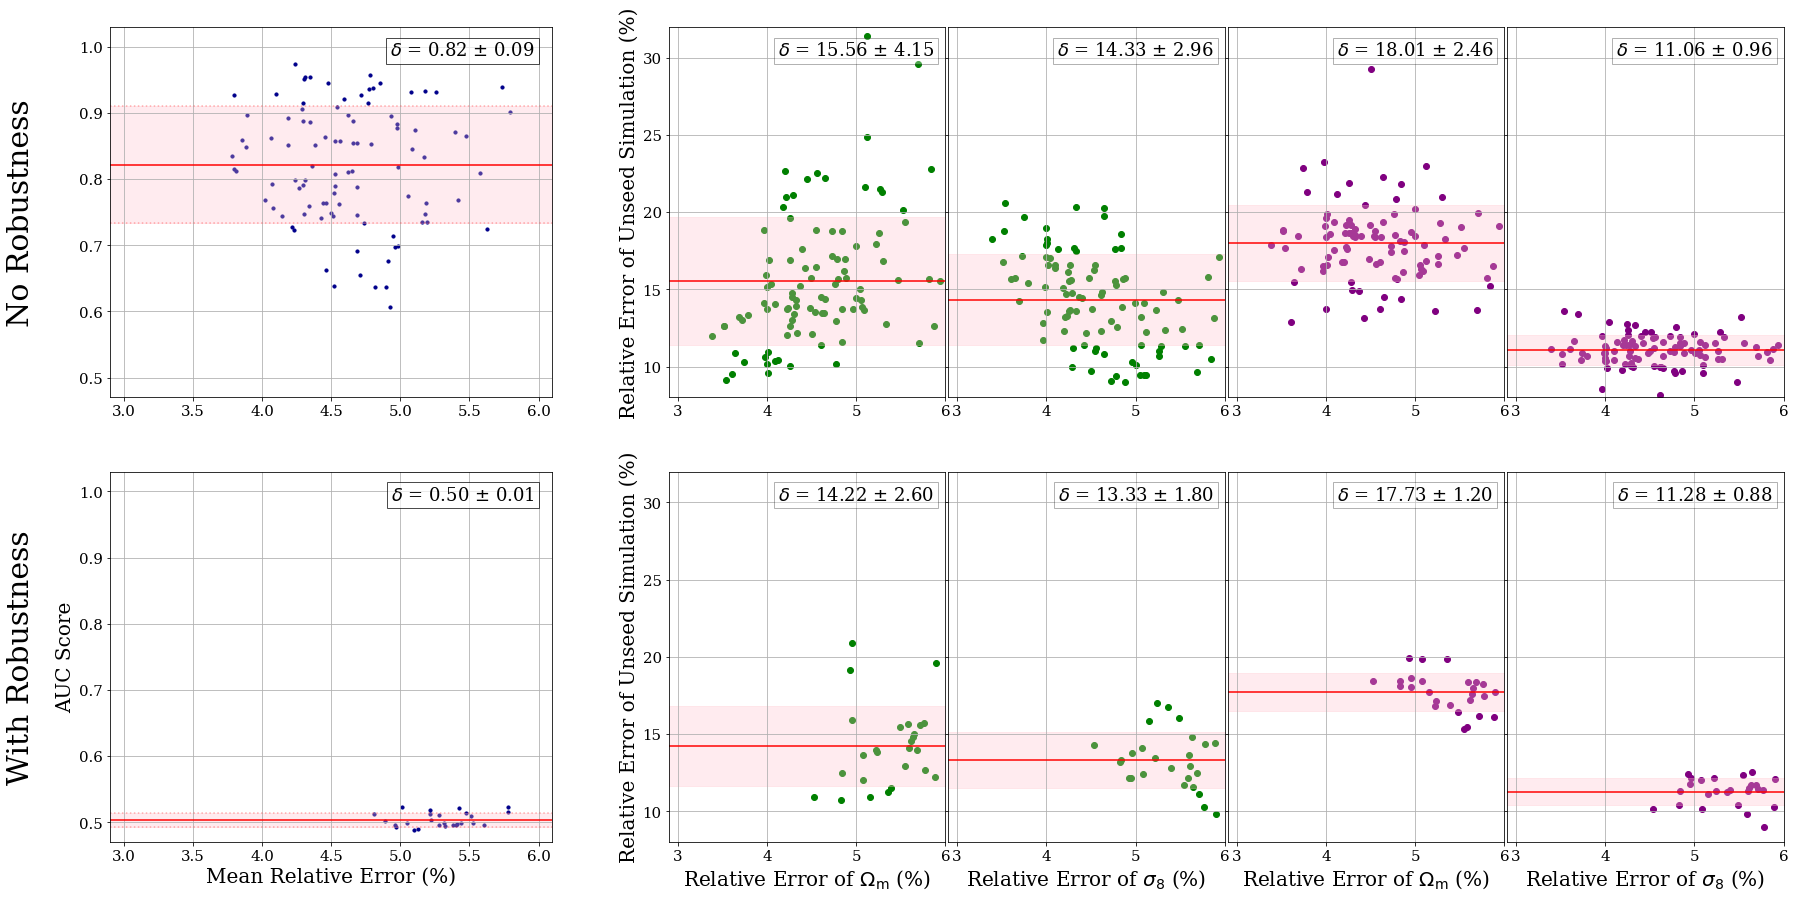

In [124]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 6,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,15),
                                      hspace=0.20,wspace=0.01,gridspec={'width_ratios':[0.8,0.2,0.5,0.5,0.5,0.5]})
#pu.remove_inner_axes(axes,size=[X,Y])

axes[1,0].axis('off')
axes[1,1].axis('off')

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            #axes[i,j].set_yticklabels([])
            pass


sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for i, suffix in enumerate(['zero','mid']):
    x = 0
    y = i
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    #axes[x,y].set_title(f"with",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_TNG_SIMBA_{suffix}.npy")
        mean_rel = (auc[:,2]+auc[:,1])/2
        axes[x,y].scatter(mean_rel, auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,3])-np.std(auc[:,3]),
                               np.mean(auc[:,3])+np.std(auc[:,3]),
                               color='pink', alpha=0.3)
        

        for j in range(4):
            k = j//2
            axes[2+j,y].scatter(auc[:,1],auc[:,j+4],c=colors[k])
            axes[2+j,y].axhline(y=np.mean(auc[:,j+4]), c='r')
            axes[2+j,y].fill_between([2.9,6.1], 
                       np.mean(auc[:,j+4])-np.std(auc[:,j+4]),
                       np.mean(auc[:,j+4])+np.std(auc[:,j+4]),
                       color='pink', alpha=0.3)
            axes[2+j,y].set_ylim(8,32)
            axes[2+j,y].set_xlim(2.9,6)
            axes[2+j,y].grid()
            text=\
r"""$\delta$ = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,j+4]),np.std(auc[:,j+4]))
            axes[2+j,y].text(0.96, 0.96, text,transform=axes[2+j,y].transAxes,
                     ha='right',va='top',bbox=dict(facecolor='white', alpha=0.3),fontsize=18)
        
            if j != 0:
                axes[2+j,y].set_yticklabels([])
            
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""$\delta$ = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,3]),np.std(auc[:,3]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,0].text(-0.2, 0.5, "No Robustness",
            transform=axes[0,0].transAxes, ha='center',va='center',fontsize=30,rotation=90)

axes[0,1].text(-0.2, 0.5, "With Robustness",
            transform=axes[0,1].transAxes, ha='center',va='center',fontsize=30,rotation=90)

#axes[3,0].set_ylabel("Relative Error On Unseed Simulation (%)")
axes[2,1].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,0].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[3,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
axes[4,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[5,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
#axes[3,0].set_xlabel("Relative Error On Self (%)")

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_robustness.png", dpi=200, bbox_inches="tight")

Text(0.5, 0, 'Mean Relative Error (%)')

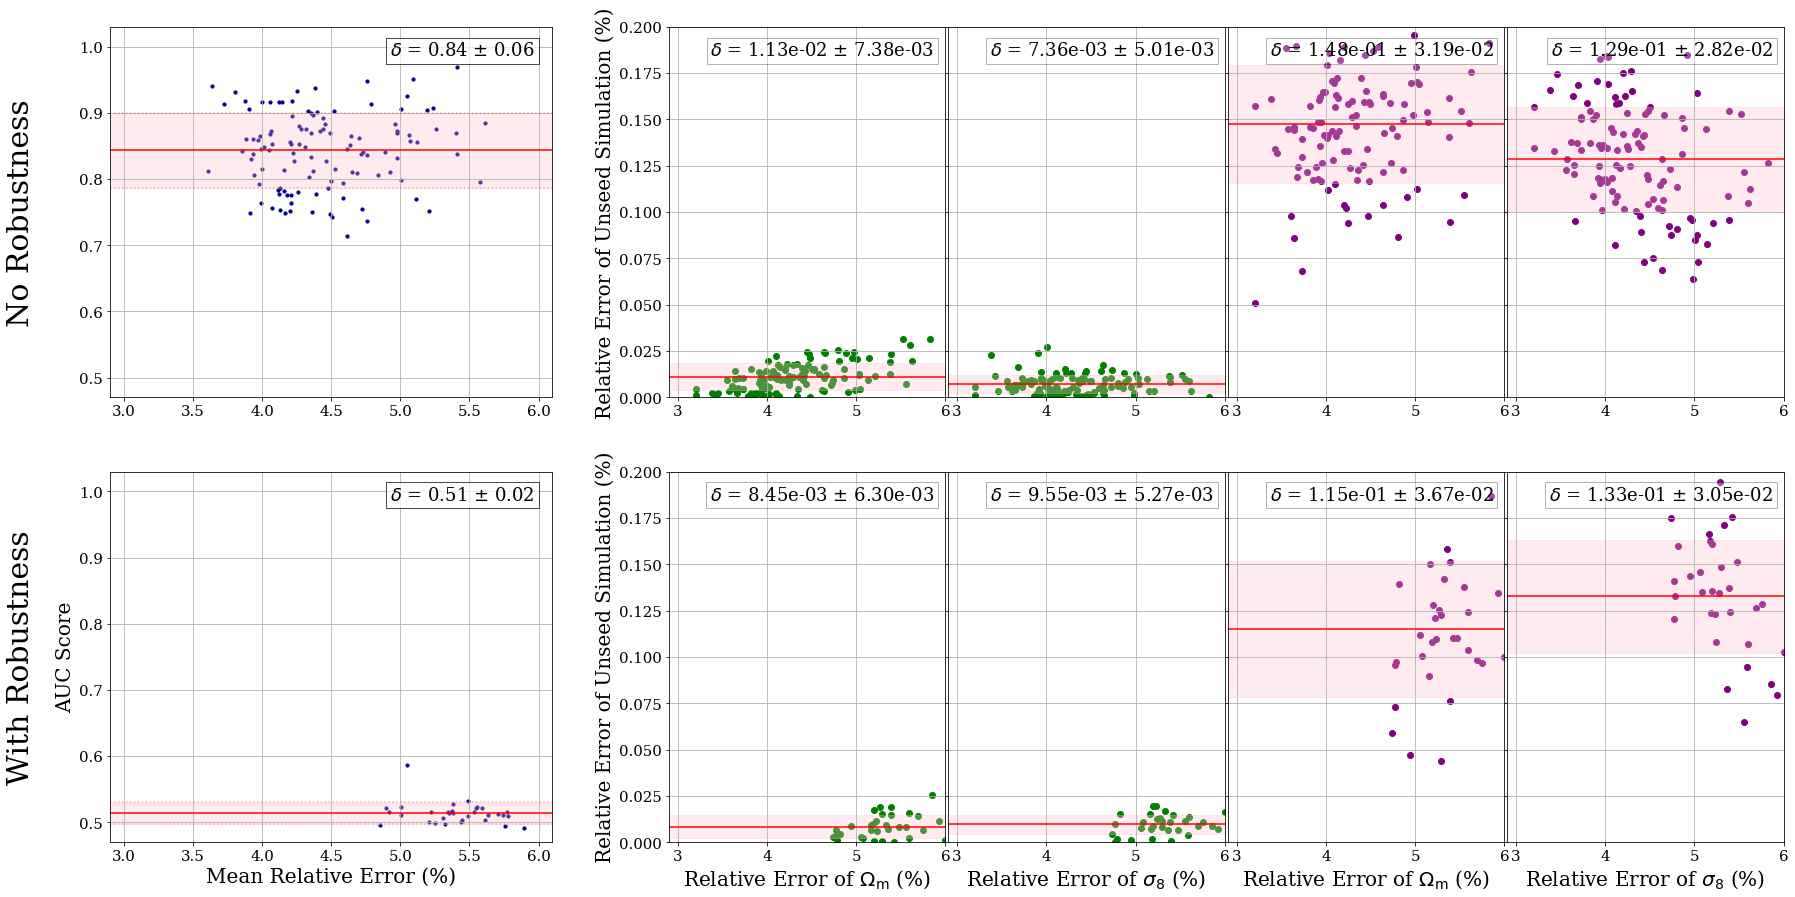

In [12]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 6,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,15),
                                      hspace=0.20,wspace=0.01,gridspec={'width_ratios':[0.8,0.2,0.5,0.5,0.5,0.5]})
#pu.remove_inner_axes(axes,size=[X,Y])

axes[1,0].axis('off')
axes[1,1].axis('off')

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            #axes[i,j].set_yticklabels([])
            pass


sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for i, suffix in enumerate(['zero','mid']):
    x = 0
    y = i
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    #axes[x,y].set_title(f"with",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_TNG_SIMBA_{suffix}_2.npy")
        mean_rel = (auc[:,2]+auc[:,5])/2
        axes[x,y].scatter(mean_rel, auc[:,1], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,1]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,1])+np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,1])-np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,1])-np.std(auc[:,1]),
                               np.mean(auc[:,1])+np.std(auc[:,1]),
                               color='pink', alpha=0.3)
        
        m = 3
        for j in range(4):
            k = j//2
            axes[2+j,y].scatter(auc[:,2],auc[:,3*j+m],c=colors[k])
            axes[2+j,y].axhline(y=np.mean(auc[:,3*j+m]), c='r')
            axes[2+j,y].fill_between([2.9,6.1], 
                       np.mean(auc[:,3*j+m])-np.std(auc[:,3*j+m]),
                       np.mean(auc[:,3*j+m])+np.std(auc[:,3*j+m]),
                       color='pink', alpha=0.3)
            axes[2+j,y].set_ylim(0,0.20)
            axes[2+j,y].set_xlim(2.9,6)
            axes[2+j,y].grid()
            text=\
r"""$\delta$ = {:.2e} $\pm$ {:.2e}""".format(np.mean(auc[:,3*j+m]),np.std(auc[:,3*j+m]))
            axes[2+j,y].text(0.96, 0.96, text,transform=axes[2+j,y].transAxes,
                     ha='right',va='top',bbox=dict(facecolor='white', alpha=0.3),fontsize=18)
        
            if j != 0:
                axes[2+j,y].set_yticklabels([])
            
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""$\delta$ = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,1]),np.std(auc[:,1]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,0].text(-0.2, 0.5, "No Robustness",
            transform=axes[0,0].transAxes, ha='center',va='center',fontsize=30,rotation=90)

axes[0,1].text(-0.2, 0.5, "With Robustness",
            transform=axes[0,1].transAxes, ha='center',va='center',fontsize=30,rotation=90)

#axes[3,0].set_ylabel("Relative Error On Unseed Simulation (%)")
axes[2,1].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,0].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[3,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
axes[4,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[5,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
#axes[3,0].set_xlabel("Relative Error On Self (%)")

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
#plt.savefig("paper_plot/stability_robustness.png", dpi=200, bbox_inches="tight")

Text(0.5, 0, 'Mean Relative Error (%)')

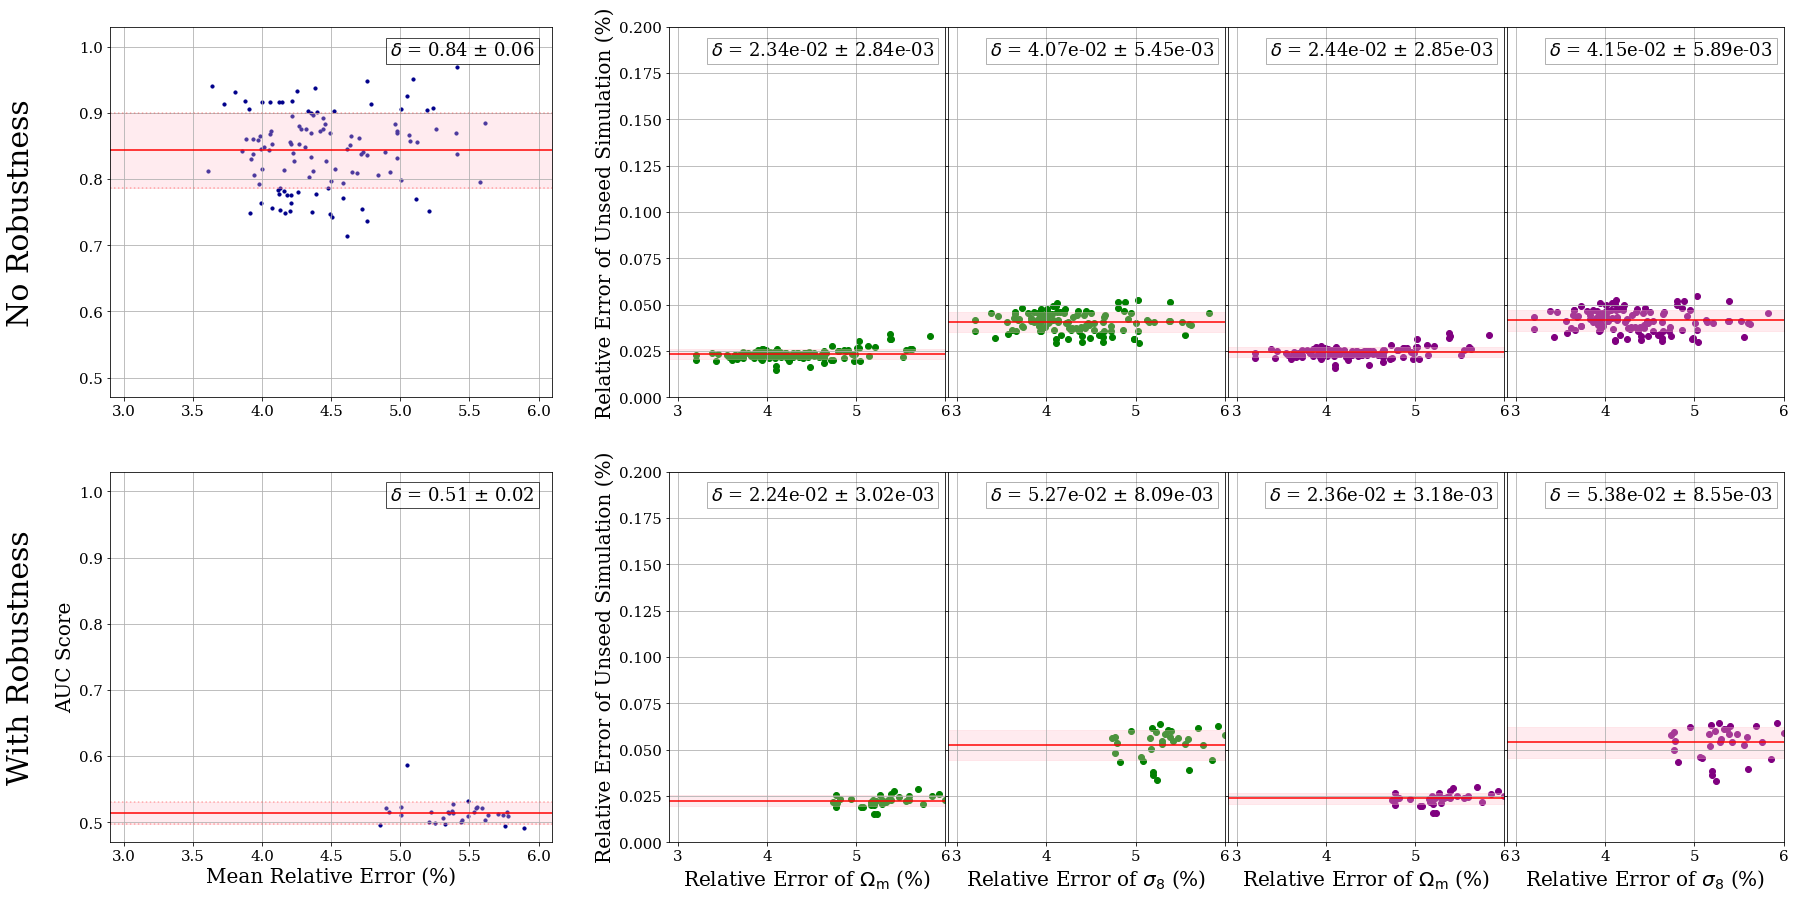

In [11]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 6,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,15),
                                      hspace=0.20,wspace=0.01,gridspec={'width_ratios':[0.8,0.2,0.5,0.5,0.5,0.5]})
#pu.remove_inner_axes(axes,size=[X,Y])

axes[1,0].axis('off')
axes[1,1].axis('off')

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            #axes[i,j].set_yticklabels([])
            pass


sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for i, suffix in enumerate(['zero','mid']):
    x = 0
    y = i
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    #axes[x,y].set_title(f"with",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_TNG_SIMBA_{suffix}_2.npy")
        mean_rel = (auc[:,2]+auc[:,5])/2
        axes[x,y].scatter(mean_rel, auc[:,1], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,1]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,1])+np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,1])-np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,1])-np.std(auc[:,1]),
                               np.mean(auc[:,1])+np.std(auc[:,1]),
                               color='pink', alpha=0.3)
        
        m = 4
        for j in range(4):
            k = j//2
            axes[2+j,y].scatter(auc[:,2],auc[:,3*j+m],c=colors[k])
            axes[2+j,y].axhline(y=np.mean(auc[:,3*j+m]), c='r')
            axes[2+j,y].fill_between([2.9,6.1], 
                       np.mean(auc[:,3*j+m])-np.std(auc[:,3*j+m]),
                       np.mean(auc[:,3*j+m])+np.std(auc[:,3*j+m]),
                       color='pink', alpha=0.3)
            axes[2+j,y].set_ylim(0,0.20)
            axes[2+j,y].set_xlim(2.9,6)
            axes[2+j,y].grid()
            text=\
r"""$\delta$ = {:.2e} $\pm$ {:.2e}""".format(np.mean(auc[:,3*j+m]),np.std(auc[:,3*j+m]))
            axes[2+j,y].text(0.96, 0.96, text,transform=axes[2+j,y].transAxes,
                     ha='right',va='top',bbox=dict(facecolor='white', alpha=0.3),fontsize=18)
        
            if j != 0:
                axes[2+j,y].set_yticklabels([])
            
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""$\delta$ = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,1]),np.std(auc[:,1]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,0].text(-0.2, 0.5, "No Robustness",
            transform=axes[0,0].transAxes, ha='center',va='center',fontsize=30,rotation=90)

axes[0,1].text(-0.2, 0.5, "With Robustness",
            transform=axes[0,1].transAxes, ha='center',va='center',fontsize=30,rotation=90)

#axes[3,0].set_ylabel("Relative Error On Unseed Simulation (%)")
axes[2,1].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,0].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[3,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
axes[4,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[5,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
#axes[3,0].set_xlabel("Relative Error On Self (%)")

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
#plt.savefig("paper_plot/stability_robustness.png", dpi=200, bbox_inches="tight")

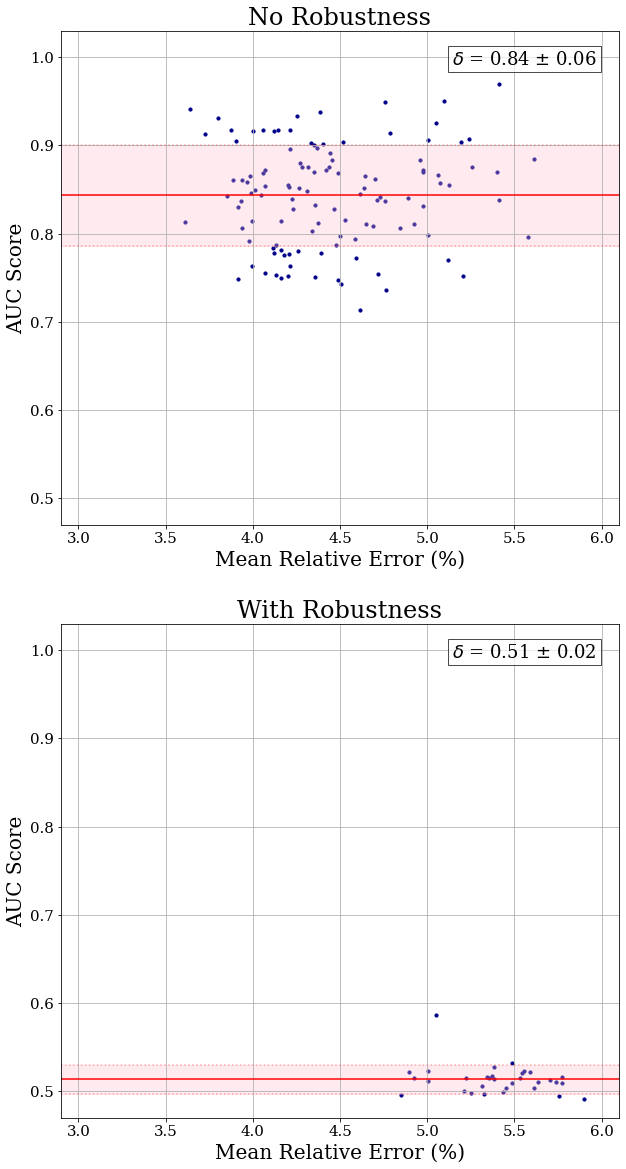

In [12]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 1,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(10,20),
                                      hspace=0.20,wspace=0.01)#,gridspec={'width_ratios':[0.8,0.2,0.5,0.5,0.5,0.5]})
#pu.remove_inner_axes(axes,size=[X,Y])

#axes[0].axis('off')
#axes[1].axis('off')

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            #axes[i,j].set_yticklabels([])
            pass


sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for i, suffix in enumerate(['zero','mid']):
    x = 0
    y = i
    axes[y].set_ylim(0.47,1.03)
    axes[y].set_xlim(2.9, 6.1)
    axes[y].grid()
    #axes[x,y].set_title(f"with",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_TNG_SIMBA_{suffix}_2.npy")
        mean_rel = (auc[:,2]+auc[:,5])/2
        axes[y].scatter(mean_rel, auc[:,1], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[y].axhline(y=np.mean(auc[:,1]), c='r')
        axes[y].axhline(y=np.mean(auc[:,1])+np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[y].axhline(y=np.mean(auc[:,1])-np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[y].fill_between([2.9,6.1], 
                               np.mean(auc[:,1])-np.std(auc[:,1]),
                               np.mean(auc[:,1])+np.std(auc[:,1]),
                               color='pink', alpha=0.3)

        """
        m = 4
        for j in range(0):
            k = j//2
            axes[2+j,y].scatter(auc[:,2],auc[:,3*j+m],c=colors[k])
            axes[2+j,y].axhline(y=np.mean(auc[:,3*j+m]), c='r')
            axes[2+j,y].fill_between([2.9,6.1], 
                       np.mean(auc[:,3*j+m])-np.std(auc[:,3*j+m]),
                       np.mean(auc[:,3*j+m])+np.std(auc[:,3*j+m]),
                       color='pink', alpha=0.3)
            axes[2+j,y].set_ylim(0,0.20)
            axes[2+j,y].set_xlim(2.9,6)
            axes[2+j,y].grid()
            text=\
r"$\delta$ = {:.2e} $\pm$ {:.2e}".format(np.mean(auc[:,3*j+m]),np.std(auc[:,3*j+m]))
            axes[2+j,y].text(0.96, 0.96, text,transform=axes[2+j,y].transAxes,
                     ha='right',va='top',bbox=dict(facecolor='white', alpha=0.3),fontsize=18)
        
            if j != 0:
                axes[2+j,y].set_yticklabels([])
            """
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""$\delta$ = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,1]),np.std(auc[:,1]))
        axes[y].text(0.96, 0.96, text,
            transform=axes[y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""
"""
axes[0,0].text(-0.2, 0.5, "No Robustness",
            transform=axes[0,0].transAxes, ha='center',va='center',fontsize=30,rotation=90)

axes[0,1].text(-0.2, 0.5, "With Robustness",
            transform=axes[0,1].transAxes, ha='center',va='center',fontsize=30,rotation=90)
"""
#axes[3,0].set_ylabel("Relative Error On Unseed Simulation (%)")
"""
axes[2,1].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,0].set_ylabel("Relative Error of Unseed Simulation (%)")
axes[2,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[3,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
axes[4,1].set_xlabel(r"Relative Error of $\Omega_\mathrm{m}$ (%)")
axes[5,1].set_xlabel(r"Relative Error of $\sigma_8$ (%)")
#axes[3,0].set_xlabel("Relative Error On Self (%)")
"""
axes[0].set_title("No Robustness")
axes[1].set_title("With Robustness")
axes[0].set_ylabel("AUC Score")
axes[1].set_ylabel("AUC Score")
axes[1].set_xlabel("Mean Relative Error (%)")
axes[0].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_robustness.png", dpi=200, bbox_inches="tight")

In [ ]:
a

In [ ]:
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 5,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,15),
                                      hspace=0.2,wspace=0.2)#,gridspec={'width_ratios':[0.8,0.2,0.5,0.5,0.5,0.5]})
#pu.remove_inner_axes(axes,size=[X,Y])

#axes[0].axis('off')
#axes[1].axis('off')

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            #axes[i,j].set_yticklabels([])
            pass


sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for x in range(1,5):
    for i, suffix in enumerate(['zero','mid']):
        y = i
        axes[x,y].set_ylim(0.0,1.0)
        axes[x,y].set_xlim(2.9, 6.1)
        axes[x,y].grid()
        #axes[x,y].set_title(f"with",fontsize=20,pad=15)
        try:
            auc      = np.load(f"auc_TNG_SIMBA_{suffix}_3.npy")
            mean_rel = (auc[:,2]+auc[:,5])/2
            axes[x,y].scatter(mean_rel, auc[:,20+x], c='darkblue', s=10)
            #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
            #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
            ### AUC score horizontal
            axes[x,y].axhline(y=np.mean(auc[:,20+x]), c='r')
            axes[x,y].axhline(y=np.mean(auc[:,20+x])+np.std(auc[:,20+x]), c='r',alpha=0.3,ls=":")
            axes[x,y].axhline(y=np.mean(auc[:,20+x])-np.std(auc[:,20+x]), c='r',alpha=0.3,ls=":")
            axes[x,y].fill_between([2.9,6.1], 
                                   np.mean(auc[:,20+x])-np.std(auc[:,20+x]),
                                   np.mean(auc[:,20+x])+np.std(auc[:,20+x]),
                                   color='pink', alpha=0.3)
    
            text=\
    r"""$p$ = {:.3f} $\pm$ {:.3f}""".format(np.mean(auc[:,20+x]),np.std(auc[:,20+x]))
            axes[x,y].text(0.96, 0.96, text,
                transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=20)
            
        except:
            continue


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
colors =['g','purple']
for i, suffix in enumerate(['zero','mid']):
    x = 0
    y = i
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    #axes[x,y].set_title(f"with",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_TNG_SIMBA_{suffix}_2.npy")
        mean_rel = (auc[:,2]+auc[:,5])/2
        axes[x,y].scatter(mean_rel, auc[:,1], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,1]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,1])+np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,1])-np.std(auc[:,1]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,1])-np.std(auc[:,1]),
                               np.mean(auc[:,1])+np.std(auc[:,1]),
                               color='pink', alpha=0.3)
        text=\
    r"""AUC = {:.3f} $\pm$ {:.3f}""".format(np.mean(auc[:,1]),np.std(auc[:,1]))
        axes[x,y].text(0.96, 0.96, text,
                transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=20)
    except:
        continue


        
axes[0,0].set_ylabel("No Robustness")
axes[0,1].set_ylabel("With Robustness")
#axes[0].set_ylabel("AUC Score")
axes[0,0].set_title(r"$P(\mathrm{SIMBA}|\mathrm{TNG})$",fontsize=25)
axes[1,0].set_title(r"$P(\mathrm{TNG}|\mathrm{TNG})$",fontsize=25)
axes[2,0].set_title(r"$P(\mathrm{SIMBA}|\mathrm{SIMBA})$",fontsize=25)
axes[3,0].set_title(r"$P(\mathrm{TNG}|\mathrm{SIMBA})$",fontsize=25)
axes[4,0].set_title("AUC Score",fontsize=25)
axes[0,0].set_xlabel("Mean Relative Error (%)")
axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_robustness_2.png", dpi=200, bbox_inches="tight")

## Stability of numbers

In [2]:
headers = ["ASTRID", "EAGLE"]
subheaders = ["Zero", "Low", "Mid", "High"]
quan = ['d','10b','a']
auc_zero =  np.load(f"auc_TNG_SIMBA_zero_3.npy")
auc_low  = np.load(f"auc_TNG_SIMBA_low_3.npy")
auc_mid  =  np.load(f"auc_TNG_SIMBA_mid_3.npy")
auc_high =  np.load(f"auc_TNG_SIMBA_high_2.npy")
data = [auc_zero, auc_low, auc_mid, auc_high]

print(f"{' ':<10}|{headers[0]:^67}||{headers[1]:^67}|")
print("-" * 148)
print(f"{' ':<10}|{subheaders[0]:^16}|{subheaders[1]:^16}|{subheaders[2]:^16}|{subheaders[3]:^16}||{subheaders[0]:^16}|{subheaders[1]:^16}|{subheaders[2]:^16}|{subheaders[3]:^16}|")
print("-" * 148)

for i in range(3):
    if i == 1:
        for j in range(4):
            data[j][:,8+i] = data[j][:,8+i]*10
            data[j][:,14+i] = data[j][:,14+i]*10
    if i == 2:
        for j in range(4):
            data[j][:,8+i]  = data[j][:,7+i] / data[j][:,8+i]/10
            data[j][:,14+i] = data[j][:,13+i]/ data[j][:,14+i]/10
    zero, low, mid, high = [[data[j][:,8+i].mean(),data[j][:,8+i].std(),data[j][:,14+i].mean(),data[j][:,14+i].std()] for j in range(4)]
    
    print(f"{quan[i]:<10}|{zero[0]:^7.2f}+-{zero[1]:^7.2f}|{low[0]:^7.2f}+-{low[1]:^7.2f}|{mid[0]:^7.2f}+-{mid[1]:^7.2f}|{high[0]:^7.2f}+-{high[1]:^7.2f}|\
|{zero[2]:^7.2f}+-{zero[3]:^7.2f}|{low[2]:^7.2f}+-{low[3]:^7.2f}|{mid[2]:^7.2f}+-{mid[3]:^7.2f}|{high[2]:^7.2f}+-{high[3]:^7.2f}|")
    print("-" * 148)
print("-" * 148)

for i in range(3):
    if i == 1:
        for j in range(4):
            data[j][:,11+i] = data[j][:,11+i]*10
            data[j][:,17+i] = data[j][:,17+i]*10
    if i == 2:
        for j in range(4):
            data[j][:,11+i]  = data[j][:,10+i] / data[j][:,11+i]/10
            data[j][:,17+i] = data[j][:,16+i]/ data[j][:,17+i]/10
    zero, low, mid, high = [[data[j][:,11+i].mean(),data[j][:,11+i].std(),data[j][:,17+i].mean(),data[j][:,17+i].std()] for j in range(4)]
    
    print(f"{quan[i]:<10}|{zero[0]:^7.2f}+-{zero[1]:^7.2f}|{low[0]:^7.2f}+-{low[1]:^7.2f}|{mid[0]:^7.2f}+-{mid[1]:^7.2f}|{high[0]:^7.2f}+-{high[1]:^7.2f}|\
|{zero[2]:^7.2f}+-{zero[3]:^7.2f}|{low[2]:^7.2f}+-{low[3]:^7.2f}|{mid[2]:^7.2f}+-{mid[3]:^7.2f}|{high[2]:^7.2f}+-{high[3]:^7.2f}|")
    print("-" * 148)

          |                              ASTRID                               ||                               EAGLE                               |
----------------------------------------------------------------------------------------------------------------------------------------------------
          |      Zero      |      Low       |      Mid       |      High      ||      Zero      |      Low       |      Mid       |      High      |
----------------------------------------------------------------------------------------------------------------------------------------------------
d         | 15.67 +- 2.77  | 14.61 +- 2.87  | 14.12 +- 2.63  | 19.33 +- 5.92  || 16.88 +- 1.99  | 17.74 +- 1.94  | 18.46 +- 1.99  | 17.93 +- 2.44  |
----------------------------------------------------------------------------------------------------------------------------------------------------
10b       | 1.48  +- 0.32  | 1.22  +- 0.40  | 1.15  +- 0.36  | 1.66  +- 0.76  || 1.50  +- 0.26  | 1.44  +-

In [97]:
headers = ["ASTRID", "EAGLE"]
subheaders = ["Zero", "Low", "Mid", "High"]
quan = ['d','10b','a']
auc_zero =  np.load(f"auc_TNG_SIMBA_zero_3.npy")
auc_low  = np.load(f"auc_TNG_SIMBA_low_3.npy")
auc_mid  =  np.load(f"auc_TNG_SIMBA_mid_3.npy")
auc_high =  np.load(f"auc_TNG_SIMBA_mid_3.npy")
data = [auc_zero, auc_low, auc_mid, auc_high]

print(f"{' ':<10}|{headers[0]:^67}||{headers[1]:^67}|")
print("-" * 148)
print(f"{' ':<10}|{subheaders[0]:^16}|{subheaders[1]:^16}|{subheaders[2]:^16}|{subheaders[3]:^16}||{subheaders[0]:^16}|{subheaders[1]:^16}|{subheaders[2]:^16}|{subheaders[3]:^16}|")
print("-" * 148)

for i in range(3):
    if i == 1:
        for j in range(4):
            data[j][:,8+i] = data[j][:,8+i]*10
            data[j][:,14+i] = data[j][:,14+i]*10
    if i == 2:
        for j in range(4):
            data[j][:,8+i]  = data[j][:,7+i] / data[j][:,8+i]/10
            data[j][:,14+i] = data[j][:,13+i]/ data[j][:,14+i]/10
    zero, low, mid, high = [
        [
            (data[j][:,8+i]/data[j][:,2]).sum()/(1/data[j][:,2]).sum(), data[j][:,8+i].std(),
            (data[j][:,14+i]/data[j][:,2]).sum()/(1/data[j][:,2]).sum(), data[j][:,14+i].std()
        ]
        for j in range(4)
    ]
    
    print(f"{quan[i]:<10}|{zero[0]:^7.2f}+-{zero[1]:^7.2f}|{low[0]:^7.2f}+-{low[1]:^7.2f}|{mid[0]:^7.2f}+-{mid[1]:^7.2f}|{high[0]:^7.2f}+-{high[1]:^7.2f}|\
|{zero[2]:^7.2f}+-{zero[3]:^7.2f}|{low[2]:^7.2f}+-{low[3]:^7.2f}|{mid[2]:^7.2f}+-{mid[3]:^7.2f}|{high[2]:^7.2f}+-{high[3]:^7.2f}|")
    print("-" * 148)
print("-" * 148)

for i in range(3):
    if i == 1:
        for j in range(4):
            data[j][:,11+i] = data[j][:,11+i]*10
            data[j][:,17+i] = data[j][:,17+i]*10
    if i == 2:
        for j in range(4):
            data[j][:,11+i]  = data[j][:,10+i] / data[j][:,11+i]/10
            data[j][:,17+i] = data[j][:,16+i]/ data[j][:,17+i]/10
    zero, low, mid, high = [
        [
            (data[j][:,11+i]/data[j][:,5]).sum()/(1/data[j][:,5]).sum(), data[j][:,11+i].std(),
            (data[j][:,17+i]/data[j][:,5]).sum()/(1/data[j][:,5]).sum(), data[j][:,17+i].std()
        ]
        for j in range(4)
    ]
    
    print(f"{quan[i]:<10}|{zero[0]:^7.2f}+-{zero[1]:^7.2f}|{low[0]:^7.2f}+-{low[1]:^7.2f}|{mid[0]:^7.2f}+-{mid[1]:^7.2f}|{high[0]:^7.2f}+-{high[1]:^7.2f}|\
|{zero[2]:^7.2f}+-{zero[3]:^7.2f}|{low[2]:^7.2f}+-{low[3]:^7.2f}|{mid[2]:^7.2f}+-{mid[3]:^7.2f}|{high[2]:^7.2f}+-{high[3]:^7.2f}|")
    print("-" * 148)

          |                              ASTRID                               ||                               EAGLE                               |
----------------------------------------------------------------------------------------------------------------------------------------------------
          |      Zero      |      Low       |      Mid       |      High      ||      Zero      |      Low       |      Mid       |      High      |
----------------------------------------------------------------------------------------------------------------------------------------------------
d         | 15.56 +- 2.77  | 14.56 +- 2.87  | 14.07 +- 2.63  | 14.07 +- 2.63  || 16.88 +- 1.99  | 17.77 +- 1.94  | 18.49 +- 1.99  | 18.49 +- 1.99  |
----------------------------------------------------------------------------------------------------------------------------------------------------
10b       | 1.47  +- 0.32  | 1.21  +- 0.40  | 1.14  +- 0.36  | 1.14  +- 0.36  || 1.51  +- 0.26  | 1.45  +-

In [153]:
auc.shape

(97, 8)

In [162]:
headers = ["Sim A","Sim B","P(B|A)", "P(A|A)", "P(B|B)", "P(A|B)", "AUC", ]
subheaders = ["Zero", "Low", "Mid", "High"]
quan = ['d','10b','a']


print("-" * 107)
print(f"{headers[0]:^10}|{headers[1]:^10}|{headers[2]:^16}|{headers[3]:^16}|{headers[4]:^16}|{headers[5]:^16}|{headers[6]:^16}|")
print("-" * 107)



sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]

for i, comb in enumerate(combinations):
    auc      = np.load(f"auc_{comb[0]}_{comb[1]}.npy")
    
    print(f"{comb[0]:^10}|{comb[1]:^10}|{auc[:,4].mean():^7.2f}+-{auc[:,4].std():^7.2f}|{auc[:,5].mean():^7.2f}+-{auc[:,5].std():^7.2f}|"\
    f"{auc[:,6].mean():^7.2f}+-{auc[:,6].std():^7.2f}|{auc[:,7].mean():^7.2f}+-{auc[:,7].std():^7.2f}|{auc[:,3].mean():^7.2f}+-{auc[:,3].std():^7.2f}|")
    print("-" * 107)


-----------------------------------------------------------------------------------------------------------
  Sim A   |  Sim B   |     P(B|A)     |     P(A|A)     |     P(B|B)     |     P(A|B)     |      AUC       |
-----------------------------------------------------------------------------------------------------------
   TNG    |  SIMBA   | 0.28  +- 0.08  | 0.72  +- 0.08  | 0.72  +- 0.09  | 0.28  +- 0.09  | 0.83  +- 0.07  |
-----------------------------------------------------------------------------------------------------------
   TNG    |  ASTRID  | 0.45  +- 0.02  | 0.55  +- 0.02  | 0.51  +- 0.02  | 0.49  +- 0.02  | 0.58  +- 0.04  |
-----------------------------------------------------------------------------------------------------------
   TNG    |  EAGLE   | 0.45  +- 0.04  | 0.55  +- 0.04  | 0.52  +- 0.04  | 0.48  +- 0.04  | 0.59  +- 0.07  |
-----------------------------------------------------------------------------------------------------------
  SIMBA   |  ASTRID  | 0.30 

In [13]:
print(*['a']+[f"{i:^10}" for i in range(5)])

a     0          1          2          3          4     


In [31]:
headers = ["Sim A","Sim B","P(B|A)", "P(A|A)", "P(B|B)", "P(A|B)", "AUC", ]
subheaders = ["Zero", "Low", "Mid", "High"]
quan = ['d','10b','a']
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
subheaders = ["AUC","P(B|A)", "P(A|A)", "P(B|B)", "P(A|B)", ]


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]


print(*[f"|{headers[0]:^10}|"]+[f"{comb[0]:^16}|" for i, comb in enumerate(combinations)])
print("-" * 120)

print(*[f"|{headers[1]:^10}|"]+[f"{comb[1]:^16}|" for i, comb in enumerate(combinations)])
print("-" * 120)

auc = []
for j, comb in enumerate(combinations):
    auc.append(np.load(f"auc_{comb[0]}_{comb[1]}.npy"))


for i in range(5):
    print(*[f"|{subheaders[i]:^10}|"]+[f"{auc[j][:,i+3].mean():^7.2f}+-{auc[j][:,i+3].std():^7.2f}|" for j in range(6)])
    print("-" * 120)


|  Sim A   |       TNG       |       TNG       |       TNG       |      SIMBA      |      SIMBA      |      ASTRID     |
------------------------------------------------------------------------------------------------------------------------
|  Sim B   |      SIMBA      |      ASTRID     |      EAGLE      |      ASTRID     |      EAGLE      |      EAGLE      |
------------------------------------------------------------------------------------------------------------------------
|   AUC    |  0.83  +- 0.07  |  0.58  +- 0.04  |  0.59  +- 0.07  |  0.81  +- 0.08  |  0.82  +- 0.05  |  0.57  +- 0.04  |
------------------------------------------------------------------------------------------------------------------------
|  P(B|A)  |  0.28  +- 0.08  |  0.45  +- 0.02  |  0.45  +- 0.04  |  0.30  +- 0.06  |  0.29  +- 0.06  |  0.47  +- 0.02  |
------------------------------------------------------------------------------------------------------------------------
|  P(A|A)  |  0.72  +- 0.08  |  

In [ ]:
headers = ["Sim A","Sim B","P(B|A)", "P(A|A)", "P(B|B)", "P(A|B)", "AUC", ]
subheaders = ["Zero", "Low", "Mid", "High"]
quan = ['d','10b','a']


print("-" * 107)
print(f"{headers[0]:^10}|{headers[1]:^10}|{headers[2]:^16}|{headers[3]:^16}|{headers[4]:^16}|{headers[5]:^16}|{headers[6]:^16}|")
print("-" * 107)



sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]

for i, comb in enumerate(combinations):
    auc      = np.load(f"auc_{comb[0]}_{comb[1]}.npy")
    
    print(f"{comb[0]:^10}|{comb[1]:^10}|{auc[:,4].mean():^7.2f}+-{auc[:,4].std():^7.2f}|{auc[:,5].mean():^7.2f}+-{auc[:,5].std():^7.2f}|"\
    f"{auc[:,6].mean():^7.2f}+-{auc[:,6].std():^7.2f}|{auc[:,7].mean():^7.2f}+-{auc[:,7].std():^7.2f}|{auc[:,3].mean():^7.2f}+-{auc[:,3].std():^7.2f}|")
    print("-" * 107)


In [99]:
auc      = np.load(f"auc_TNG_SIMBA_high_2.npy", allow_pickle=True)
auc.shape

(0,)

In [95]:
auc      = np.load(f"auc_SIMBA_EAGLE.npy", allow_pickle=True)
auc.shape

(39, 8)

In [96]:
auc      = np.load(f"auc_TNG_SIMBA_zero_3.npy", allow_pickle=True)
auc.shape

(116, 24)

In [32]:
auc      = np.load(f"auc_TNG_ASTRID.npy", allow_pickle=True)
auc.shape

(165, 8)

In [ ]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
combinations = list(itertools.combinations(sims, 2))
param=1
colors = {'SIMBA':'r', 'TNG':'b', 'ASTRID':'g', 'EAGLE':'purple'}
ms = {'SIMBA':'o', 'TNG':'^', 'ASTRID':'s', 'EAGLE':'D'}
for x, sim in enumerate(sims):
    externals = [tmp2 for tmp2 in sims if sim is not tmp2]
    rel_err     = np.load(f"rel_err_{sim}_all.npy")
    crs_rel_err = np.load(f"crs_rel_err_{sim}_all.npy")
    _, min1, min2 = rel_err.min(axis=0)
    idx = np.logical_and(rel_err[:,1]<min1+1,rel_err[:,2]<min2+1)
    rel_err = rel_err[idx,:]
    crs_rel_err = crs_rel_err[idx,:,:]
    print(r"{}: {:.2f} $\pm$ {:.2f}, {:.2f} $\pm$ {:.2f}"\
                  .format(sim, np.mean(rel_err[:,1]),np.std(rel_err[:,1]), np.mean(rel_err[:,2]),np.std(rel_err[:,2])))
    print()
    for y, sim2 in enumerate(externals):
        print(r"{}: {:.2f} $\pm$ {:.2f}, {:.2f} $\pm$ {:.2f}"\
          .format(sim2, np.mean(crs_rel_err[:,y,1]),np.std(crs_rel_err[:,y,1]), np.mean(crs_rel_err[:,y,2]),np.std(crs_rel_err[:,y,2])))
    print('\n')

# ETC

### TNG vs SIMBA

#### Dataload

In [17]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_zero_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_zero = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_zero = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=5.750%, R2 score=0.955,chi2=0.712, bias=-0.002
$\sigma_8$: MSE=0.002, % error=4.689%, R2 score=0.828,chi2=0.943, bias=0.003
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.002, % error=14.398%, R2 score=0.833,chi2=2.919, bias=-0.027
$\sigma_8$: MSE=0.021, % error=14.086%, R2 score=-0.596,chi2=9.963, bias=0.070


In [19]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_low_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_low = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_low = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=6.777%, R2 score=0.949,chi2=0.604, bias=-0.003
$\sigma_8$: MSE=0.002, % error=4.913%, R2 score=0.816,chi2=0.872, bias=-0.002
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.002, % error=12.552%, R2 score=0.875,chi2=1.608, bias=-0.013
$\sigma_8$: MSE=0.020, % error=13.746%, R2 score=-0.537,chi2=8.695, bias=0.075


In [20]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_mid_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_mid = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_mid = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=6.683%, R2 score=0.949,chi2=0.864, bias=-0.004
$\sigma_8$: MSE=0.003, % error=5.188%, R2 score=0.789,chi2=0.973, bias=0.004
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.003, % error=18.737%, R2 score=0.739,chi2=10.644, bias=-0.040
$\sigma_8$: MSE=0.030, % error=16.739%, R2 score=-1.276,chi2=41418.969, bias=0.111


#### plot for $\Omega_m$

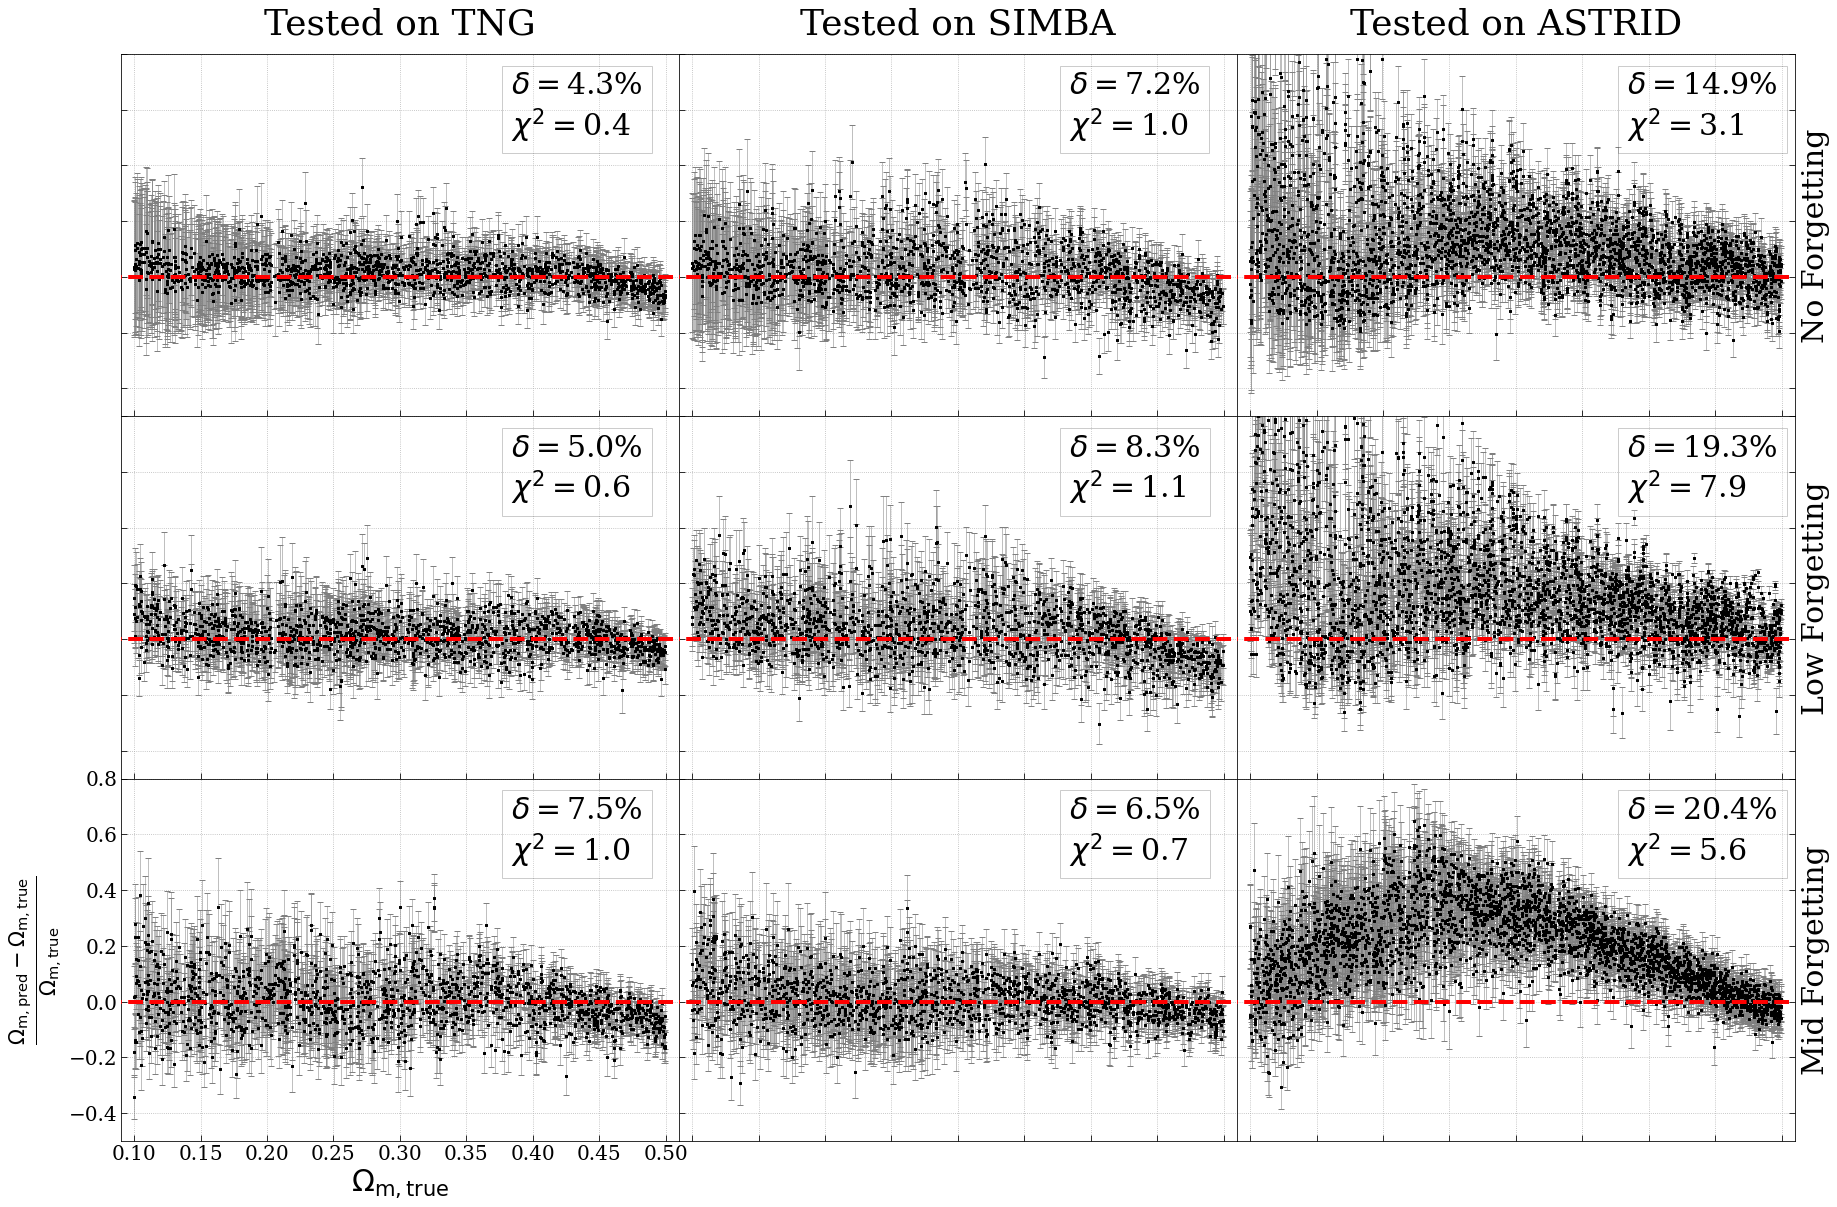

In [21]:
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 3,3
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,20),
                                      hspace=0.00,wspace=0.00)
#pu.remove_inner_axes(axes,(X,Y))
par = 0 # sigma_8
ideal1 = np.linspace(0.0,0.6,3)

index = np.arange(15000)
np.random.shuffle(index)
index = index[:3000]
data = [data_zero, data_mid, data_high]
ast  = [ast_zero, ast_mid, ast_high]
for i in range(X):
    for j in range(Y):
        if (i < 2):
            y_true = data[j][0][i][:,par]
            y_mean = data[j][1][i][:,par]
            y_std  = data[j][2][i][:,par]
        elif (i == 2):
            y_true = ast[j][0][index,par]
            y_mean = ast[j][1][0][index,par]
            y_std  = ast[j][1][1][index,par]
        y_res     = (y_mean-y_true)/y_true
        y_res_std = y_std/y_true
        
        axes[i,j].errorbar(y_true,y_res,y_res_std,linestyle="None",ecolor="grey", capsize=3,lw=0.5)#, s=1)
        axes[i,j].scatter(y_true,y_res,s=4,c='k',zorder=20,marker='s')
        axes[i,j].plot(ideal1,[0,0,0],"r",ls='--',lw=4,zorder=40)
        
        rel_err = np.mean(np.abs(y_res))*100
        xi2     = np.mean((y_mean-y_true)**2/y_std**2)
        props = dict(boxstyle='square', facecolor='white', alpha=0.2)
        text=\
f"""$\\delta=${rel_err:.1f}%
$\\chi^2=${xi2:.1f}"""
        axes[i,j].text(.7, .95, text,
         ha='left', va='top', transform=axes[i,j].transAxes,
         bbox=props)
        
        axes[i,j].tick_params(direction='in', axis='both', which='both', length=6)
        axes[i,j].grid(ls=':')
        if j == Y-1 and i == 0:
            axes[i,j].set_xlabel(r"$\Omega_\mathrm{m, true}$")
            axes[i,j].set_ylabel(r"$\frac{\Omega_\mathrm{m, pred}-\Omega_\mathrm{m, true}}{\Omega_\mathrm{m, true}}$")
        else:
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])
        axes[i,j].set_xlim(0.09,0.51)
        axes[i,j].set_ylim(-.5,.8)
        
axes[0,0].set_title('Tested on TNG',pad=20)
axes[1,0].set_title('Tested on SIMBA',pad=20)
axes[2,0].set_title('Tested on ASTRID',pad=20)
labels = ['No Forgetting', 'Low Forgetting', 'Mid Forgetting', 'High Forgetting']
for i in range(Y):
    axes[X-1,i].yaxis.set_label_position("right")
    axes[X-1,i].yaxis.tick_right()
    axes[X-1,i].set_ylabel(labels[i])
plt.savefig('paper_plot/TNG_SIMBA_T_performance_om.png',dpi=200, bbox_inches='tight')

#### Plot for $\sigma_8$

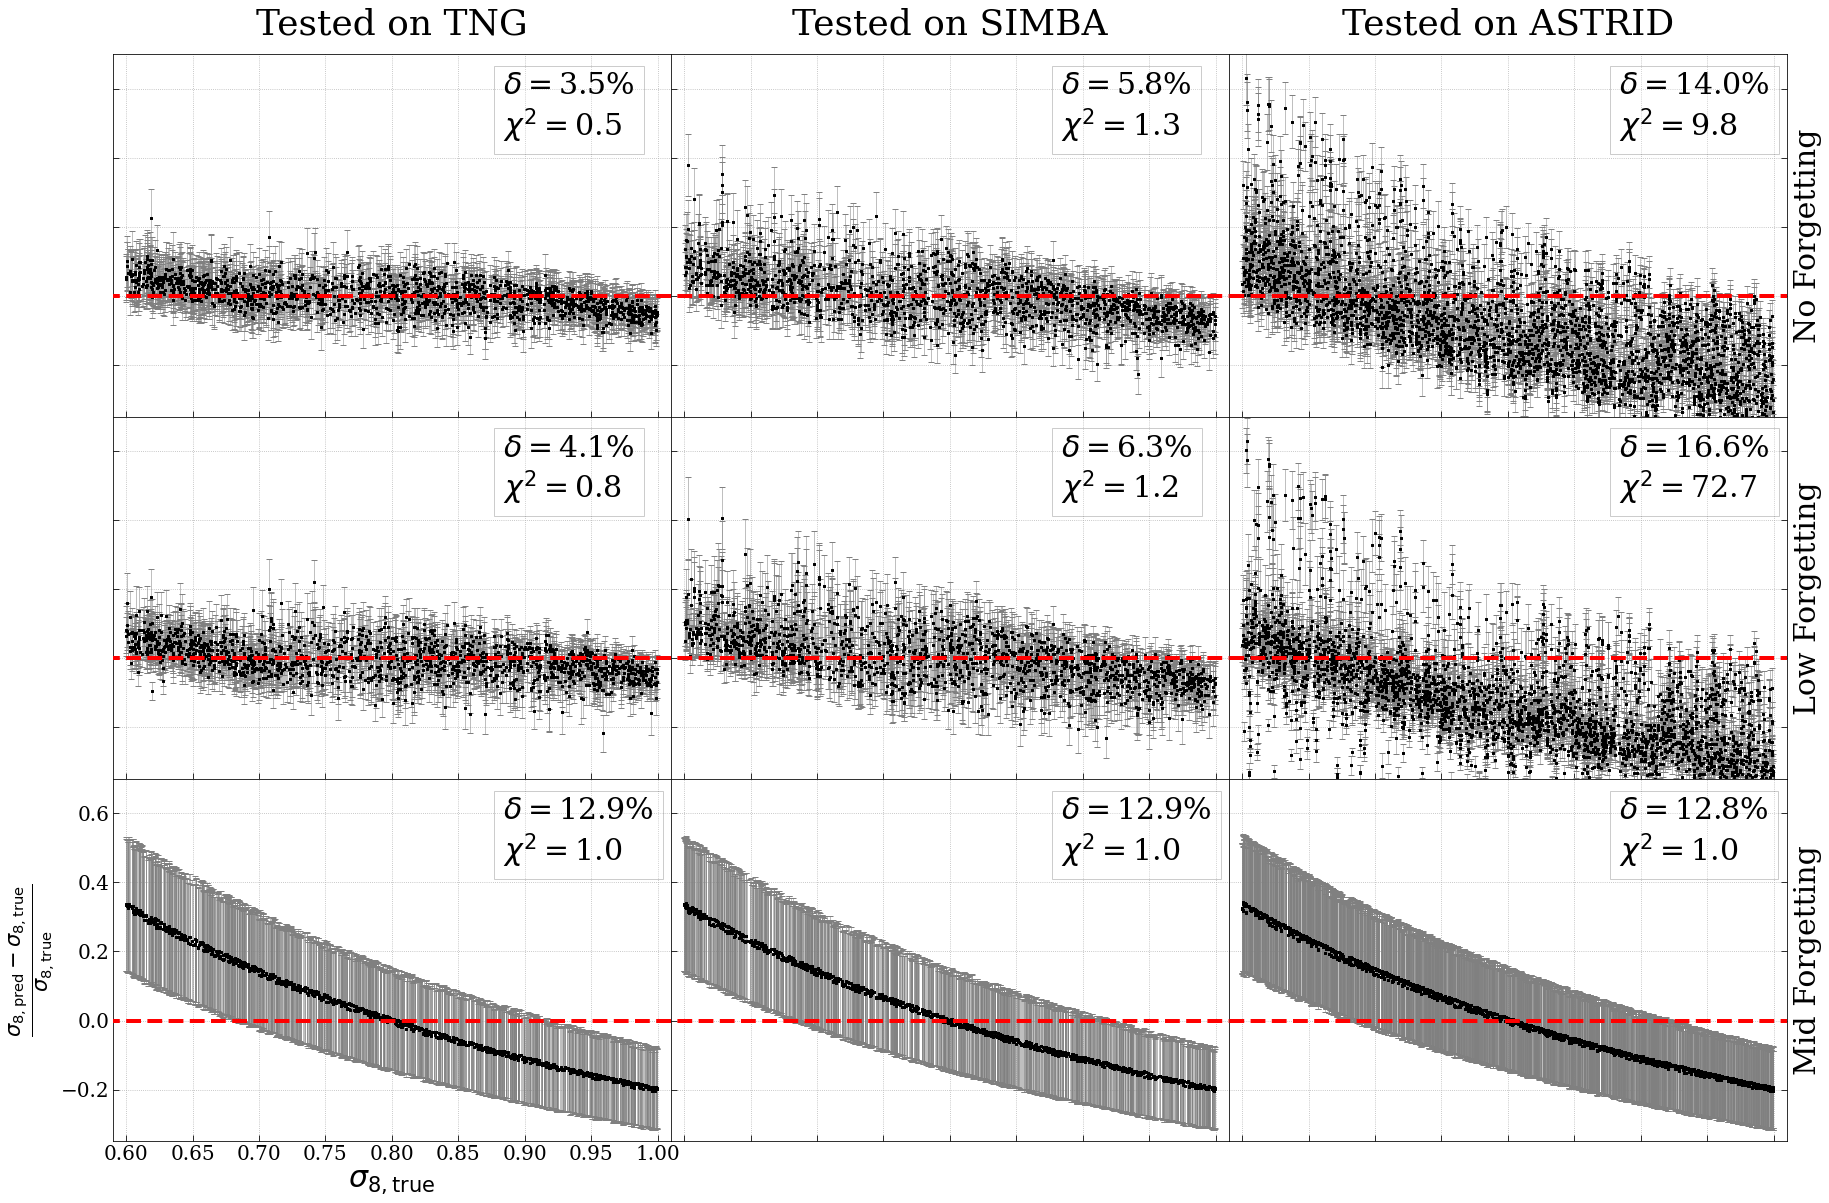

In [22]:
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 3,3
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,20),
                                      hspace=0.00,wspace=0.00)
#pu.remove_inner_axes(axes,(X,Y))
par = 1 # sigma_8
ideal1 = np.linspace(0.0,2,3)

index = np.arange(15000)
np.random.shuffle(index)
index = index[:3000]
data = [data_zero, data_mid, data_high]
ast  = [ast_zero, ast_mid, ast_high]
for i in range(X):
    for j in range(Y):
        if (i < 2):
            y_true = data[j][0][i][:,par]
            y_mean = data[j][1][i][:,par]
            y_std  = data[j][2][i][:,par]
        elif (i == 2):
            y_true = ast[j][0][index,par]
            y_mean = ast[j][1][0][index,par]
            y_std  = ast[j][1][1][index,par]
        y_res     = (y_mean-y_true)/y_true
        y_res_std = y_std/y_true
        
        axes[i,j].errorbar(y_true,y_res,y_res_std,linestyle="None",ecolor="grey", capsize=3,lw=0.5)#, s=1)
        axes[i,j].scatter(y_true,y_res,s=4,c='k',zorder=20,marker='s')
        axes[i,j].plot(ideal1,[0,0,0],"r",ls='--',lw=4,zorder=40)
        
        rel_err = np.mean(np.abs(y_res))*100
        xi2     = np.mean((y_mean-y_true)**2/y_std**2)
        props = dict(boxstyle='square', facecolor='white', alpha=0.2)
        text=\
f"""$\\delta=${rel_err:.1f}%
$\\chi^2=${xi2:.1f}"""
        axes[i,j].text(.7, .95, text,
         ha='left', va='top', transform=axes[i,j].transAxes,
         bbox=props)
        
        axes[i,j].tick_params(direction='in', axis='both', which='both', length=6)
        axes[i,j].grid(ls=':')
        if j == Y-1 and i == 0:
            axes[i,j].set_xlabel(r"$\sigma_\mathrm{8, true}$")
            axes[i,j].set_ylabel(r"$\frac{\sigma_\mathrm{8, pred}-\sigma_\mathrm{8, true}}{\sigma_\mathrm{8, true}}$")
        else:
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])
        axes[i,j].set_xlim(0.59,1.01)
        axes[i,j].set_ylim(-.35,.7)
        
axes[0,0].set_title('Tested on TNG',pad=20)
axes[1,0].set_title('Tested on SIMBA',pad=20)
axes[2,0].set_title('Tested on ASTRID',pad=20)
labels = ['No Forgetting', 'Low Forgetting', 'Mid Forgetting', 'High Forgetting']
for i in range(Y):
    axes[X-1,i].yaxis.set_label_position("right")
    axes[X-1,i].yaxis.tick_right()
    axes[X-1,i].set_ylabel(labels[i])
plt.savefig('paper_plot/TNG_SIMBA_T_performance_sig.png',dpi=200, bbox_inches='tight')